In [2]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
import src.util as util
import yaml
import copy
from tqdm import tqdm
import os
from datetime import datetime

In [3]:
config_data=util.config_load()

In [4]:
df_ben_conv=util.pickle_load(config_data["raw_dataset_path_train_ben"])


In [5]:
df_ben_conv.columns

Index(['BeneID', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'AGE', 'DOD_Flag',
       'TotalIPAnnualAmt', 'TotalOPAnnualAmt'],
      dtype='object')

**Analysis of Beneficiary file**

Q.No1 - What is the distribution of beneficiaries and different disease indicators

1.1 Count of Beneficiaries vs health conditions
1.2 Sum of total annual ip reimbursement amount vs condition
1.3 Sum of total annual op reimbursement amount vs condition

-0.25 0
0.75 0
                        count
RenalDiseaseIndicator        
0                      118978
Y                       19578 



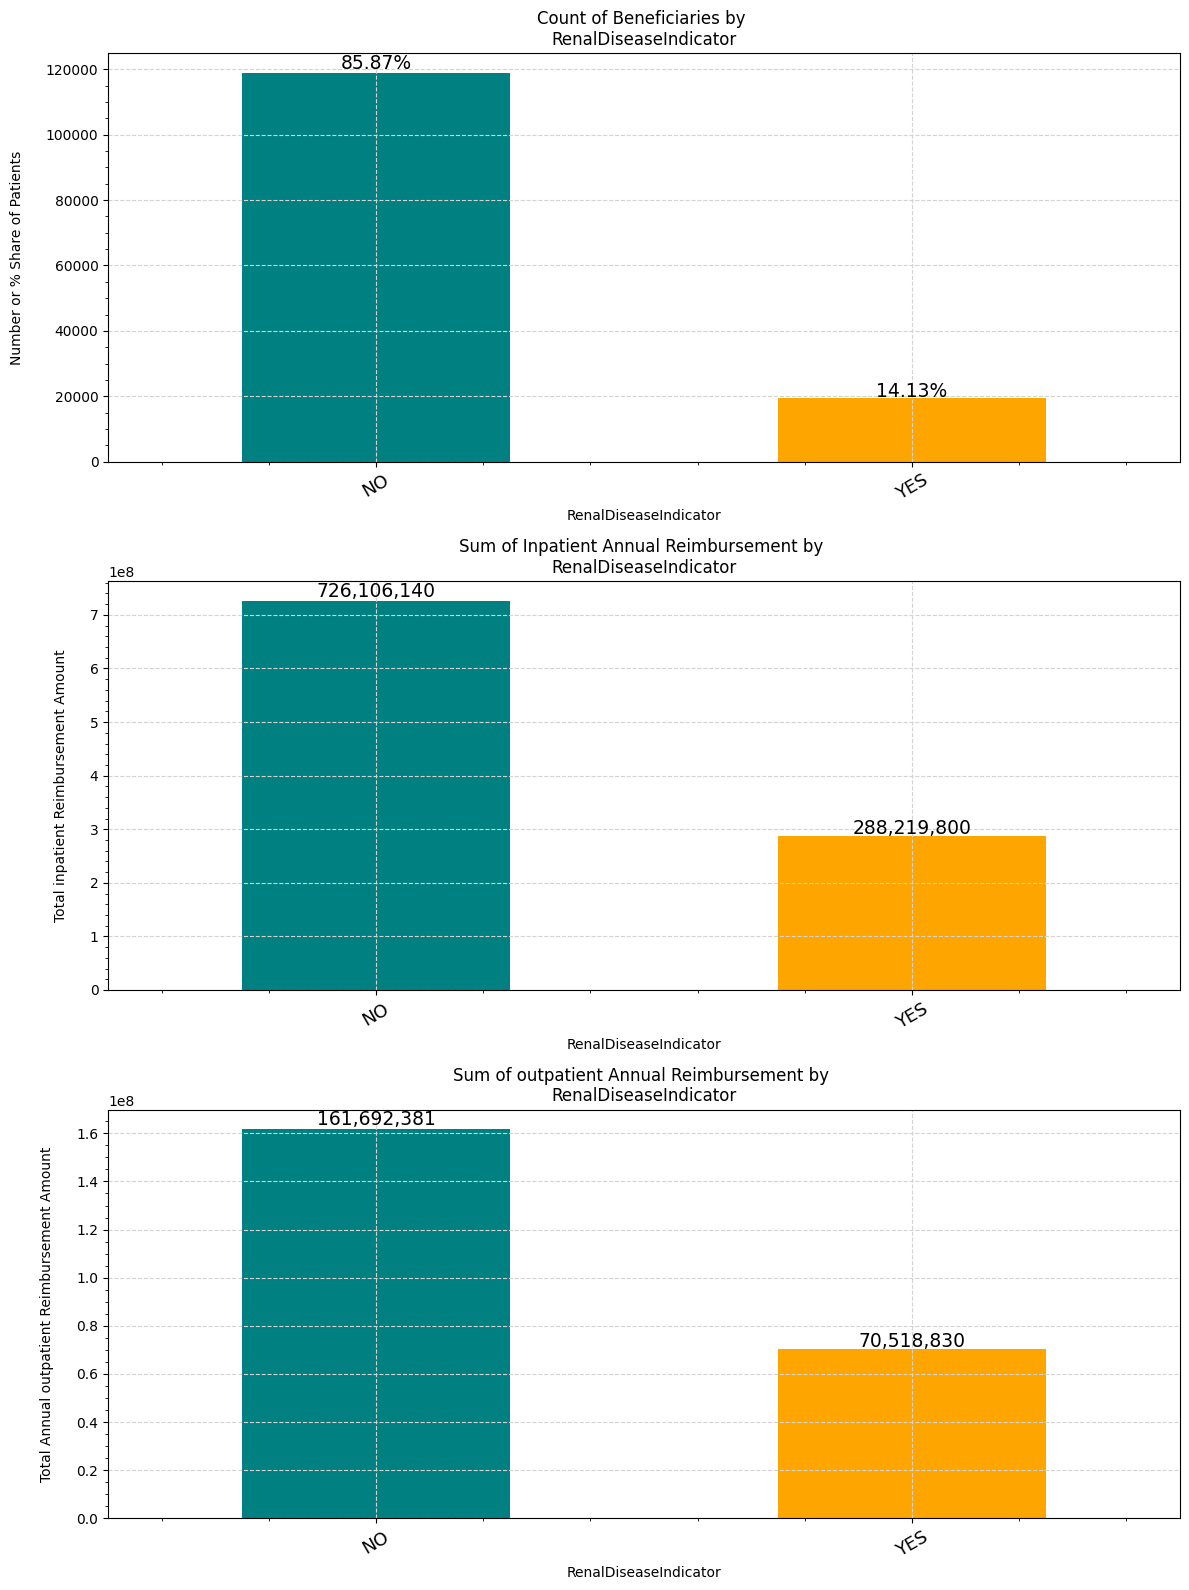

-0.25 0
0.75 0
                       count
ChronicCond_Alzheimer       
2                      92530
1                      46026 



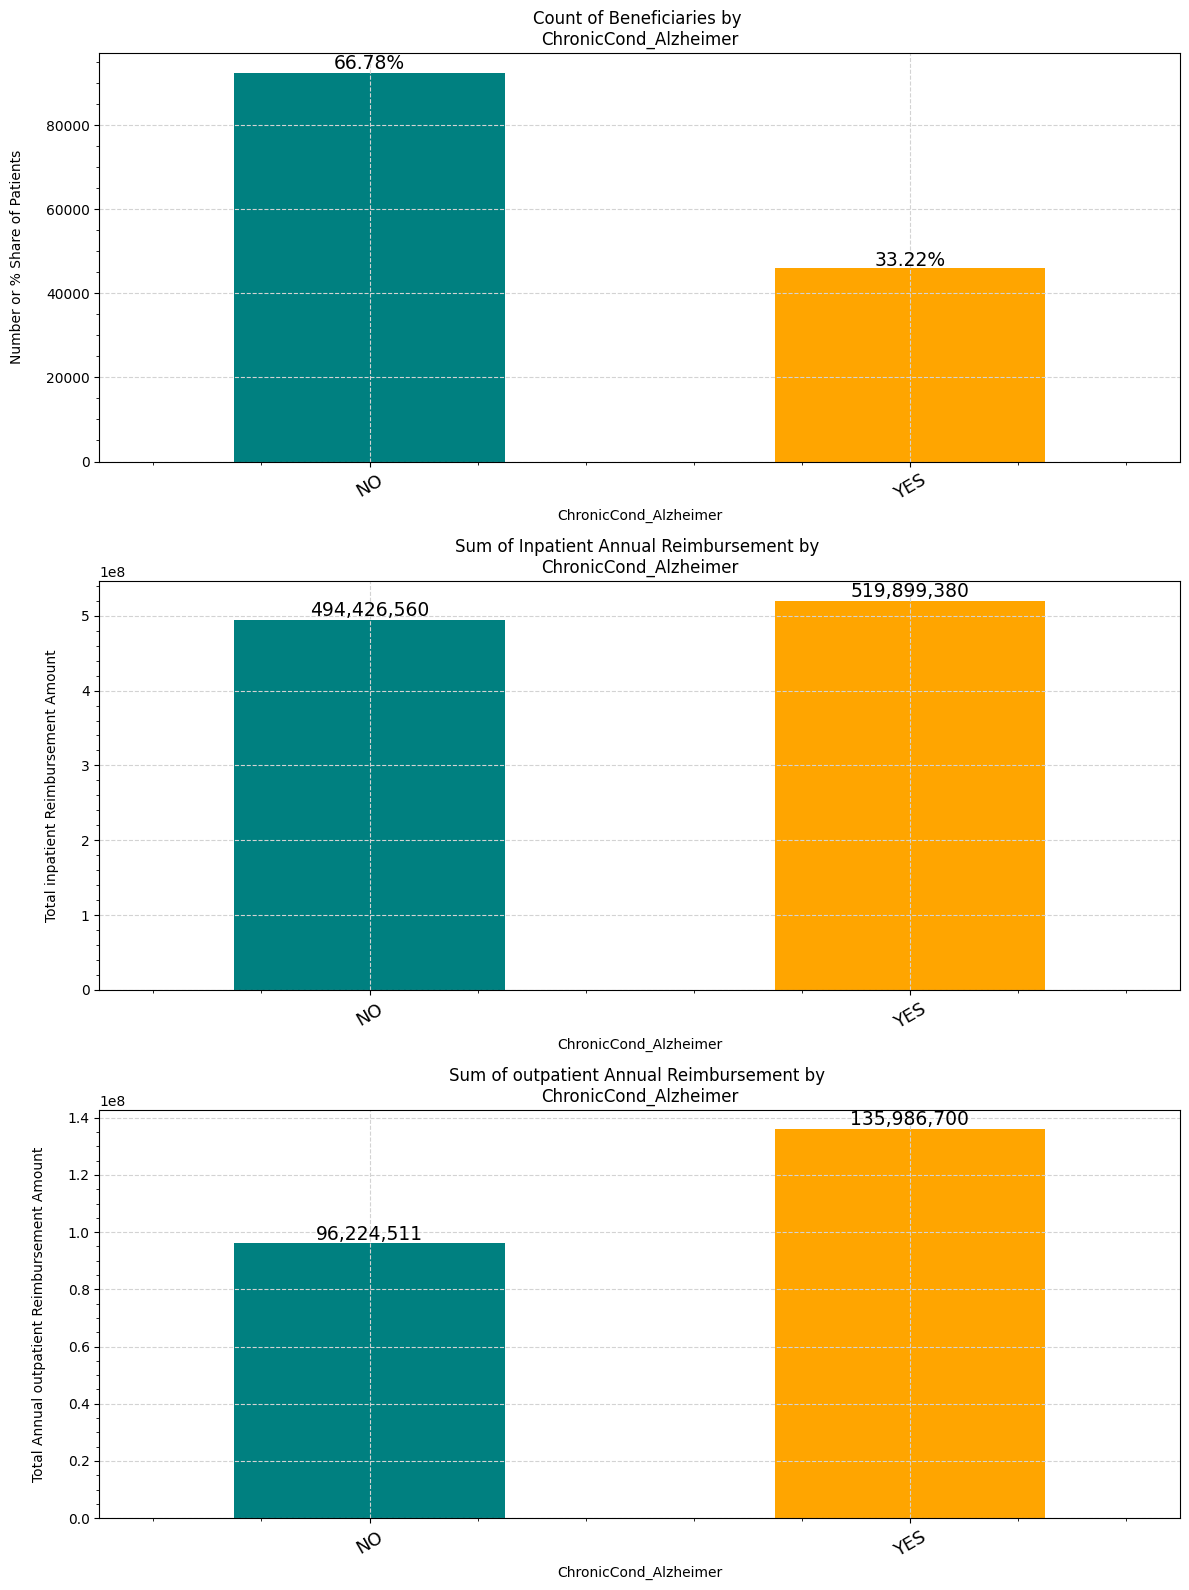

-0.25 0
0.75 0
                          count
ChronicCond_Heartfailure       
2                         70154
1                         68402 



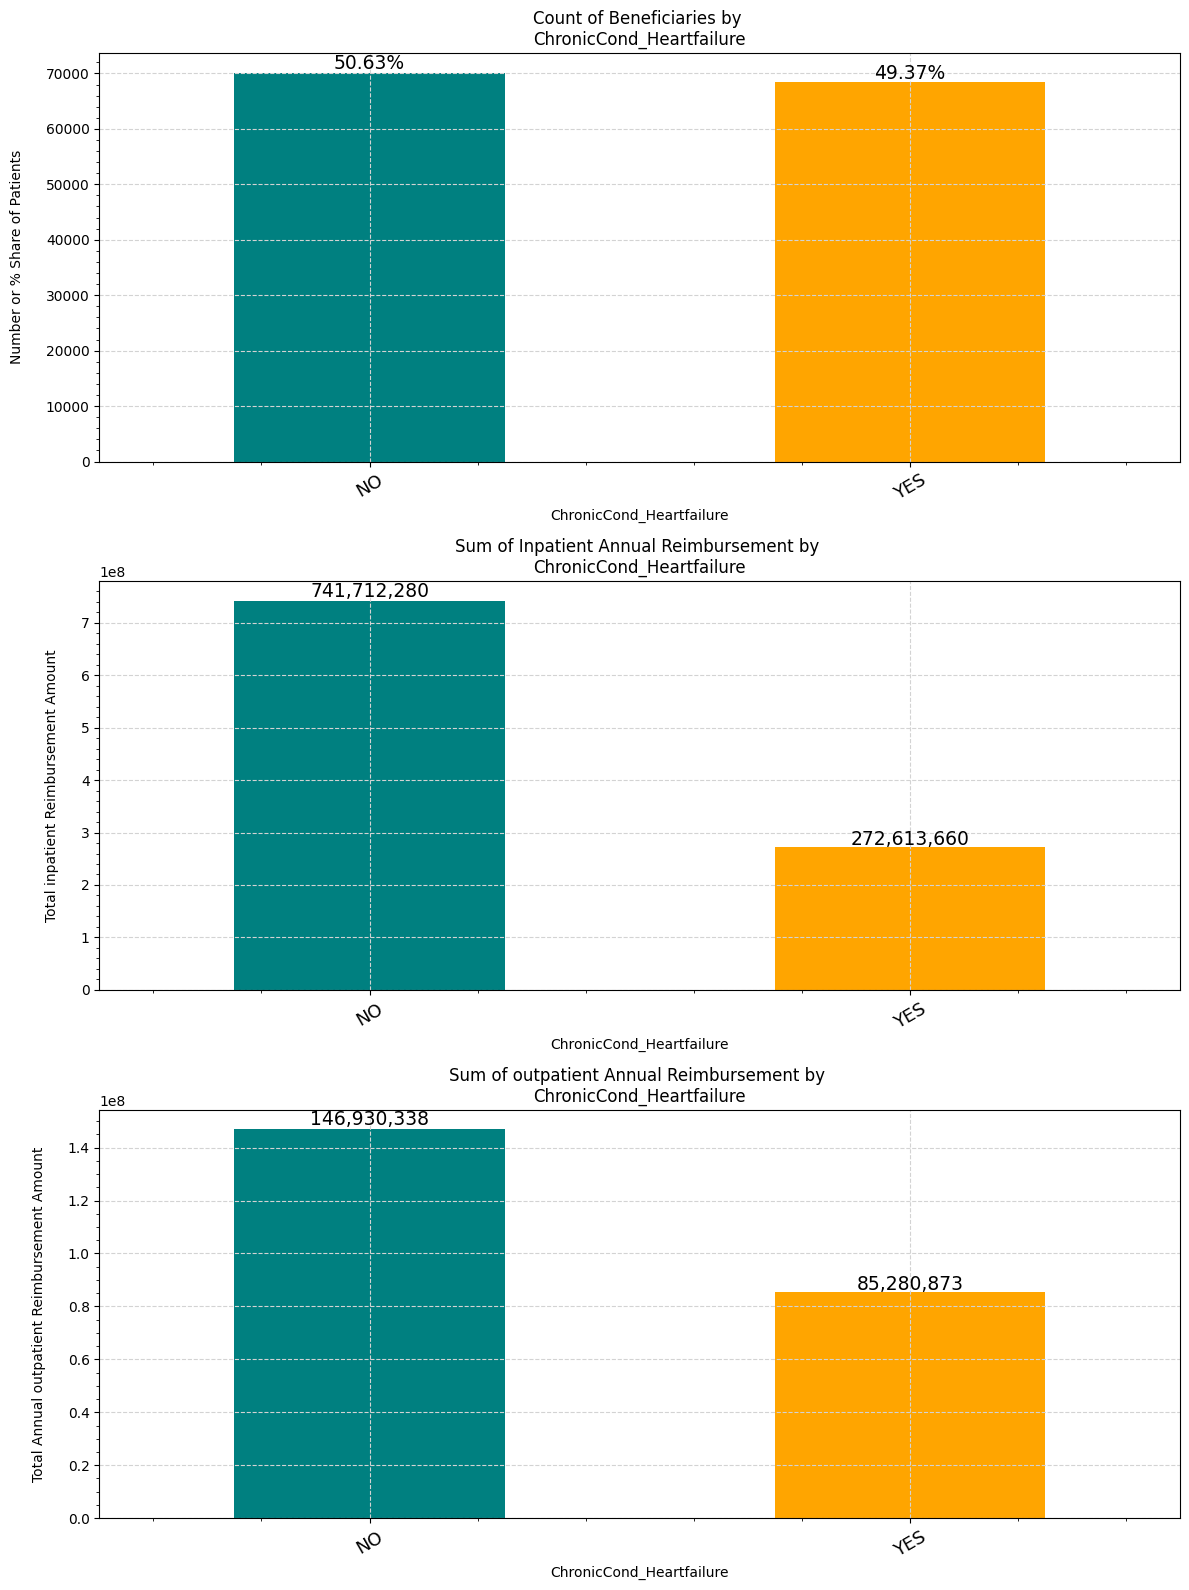

-0.25 0
0.75 0
                           count
ChronicCond_KidneyDisease       
2                          95277
1                          43279 



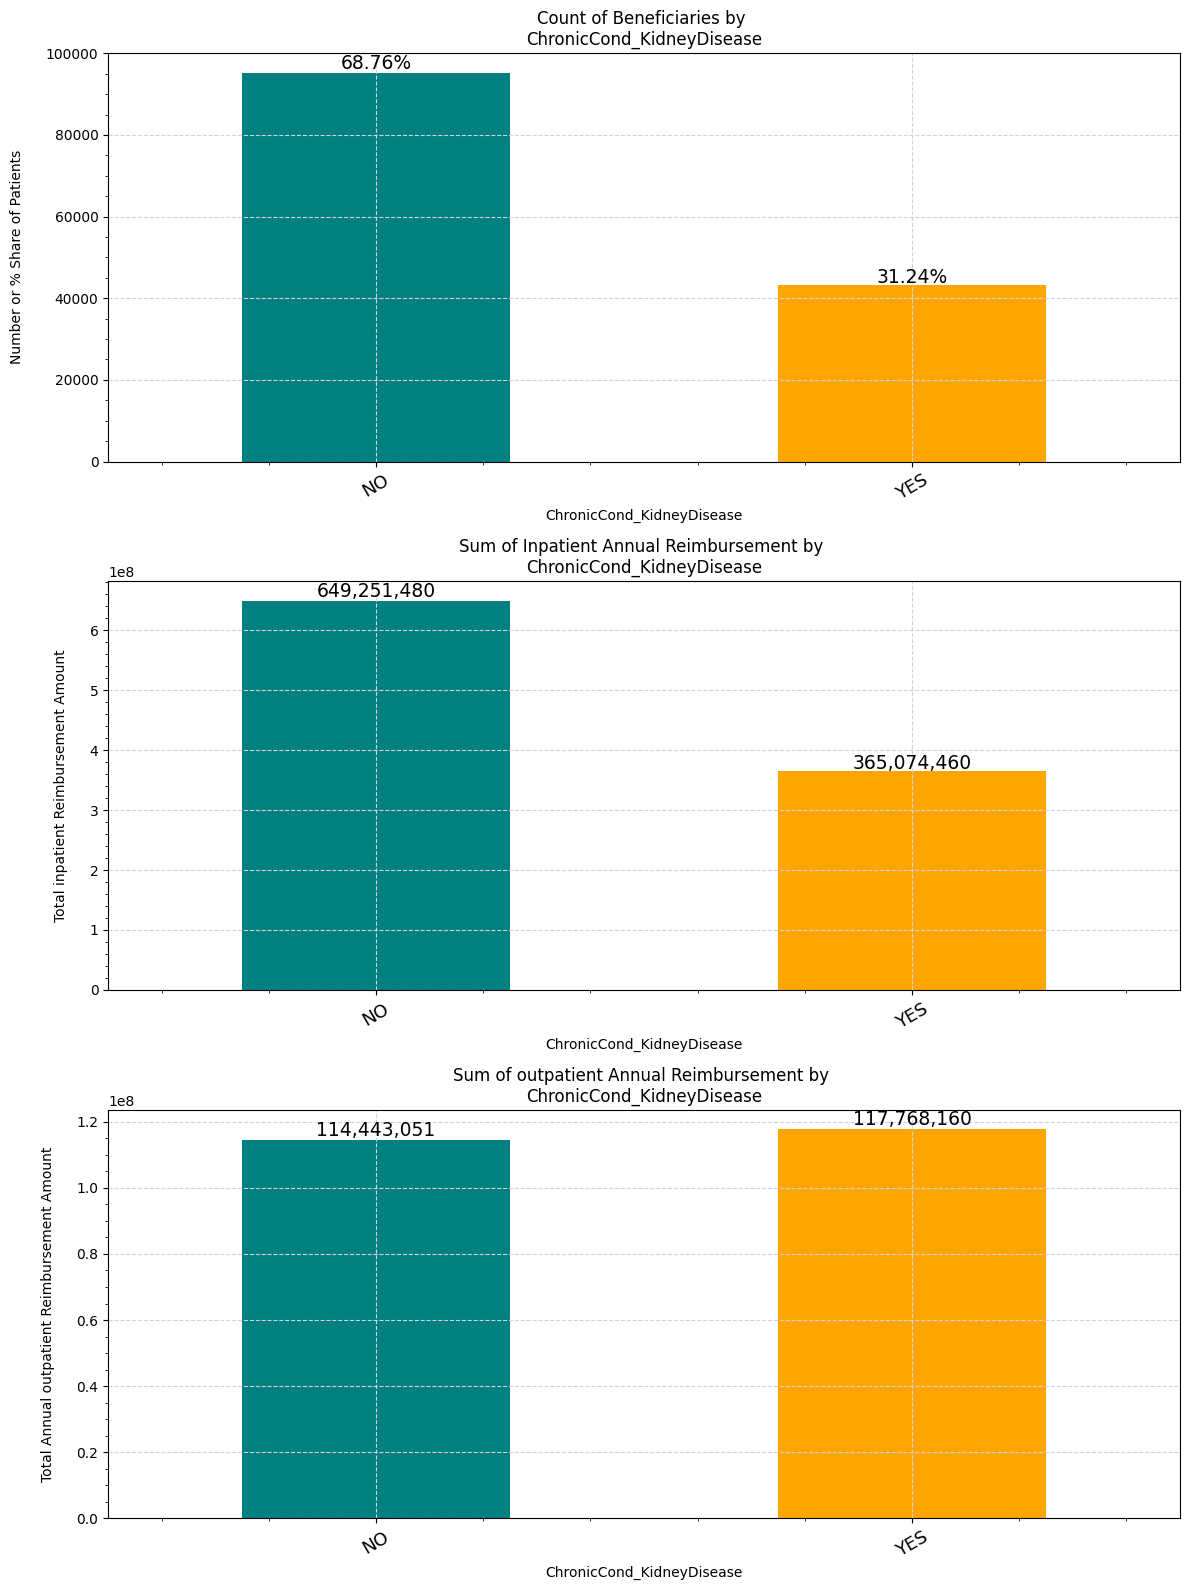

-0.25 0
0.75 0
                     count
ChronicCond_Cancer        
2                   121935
1                    16621 



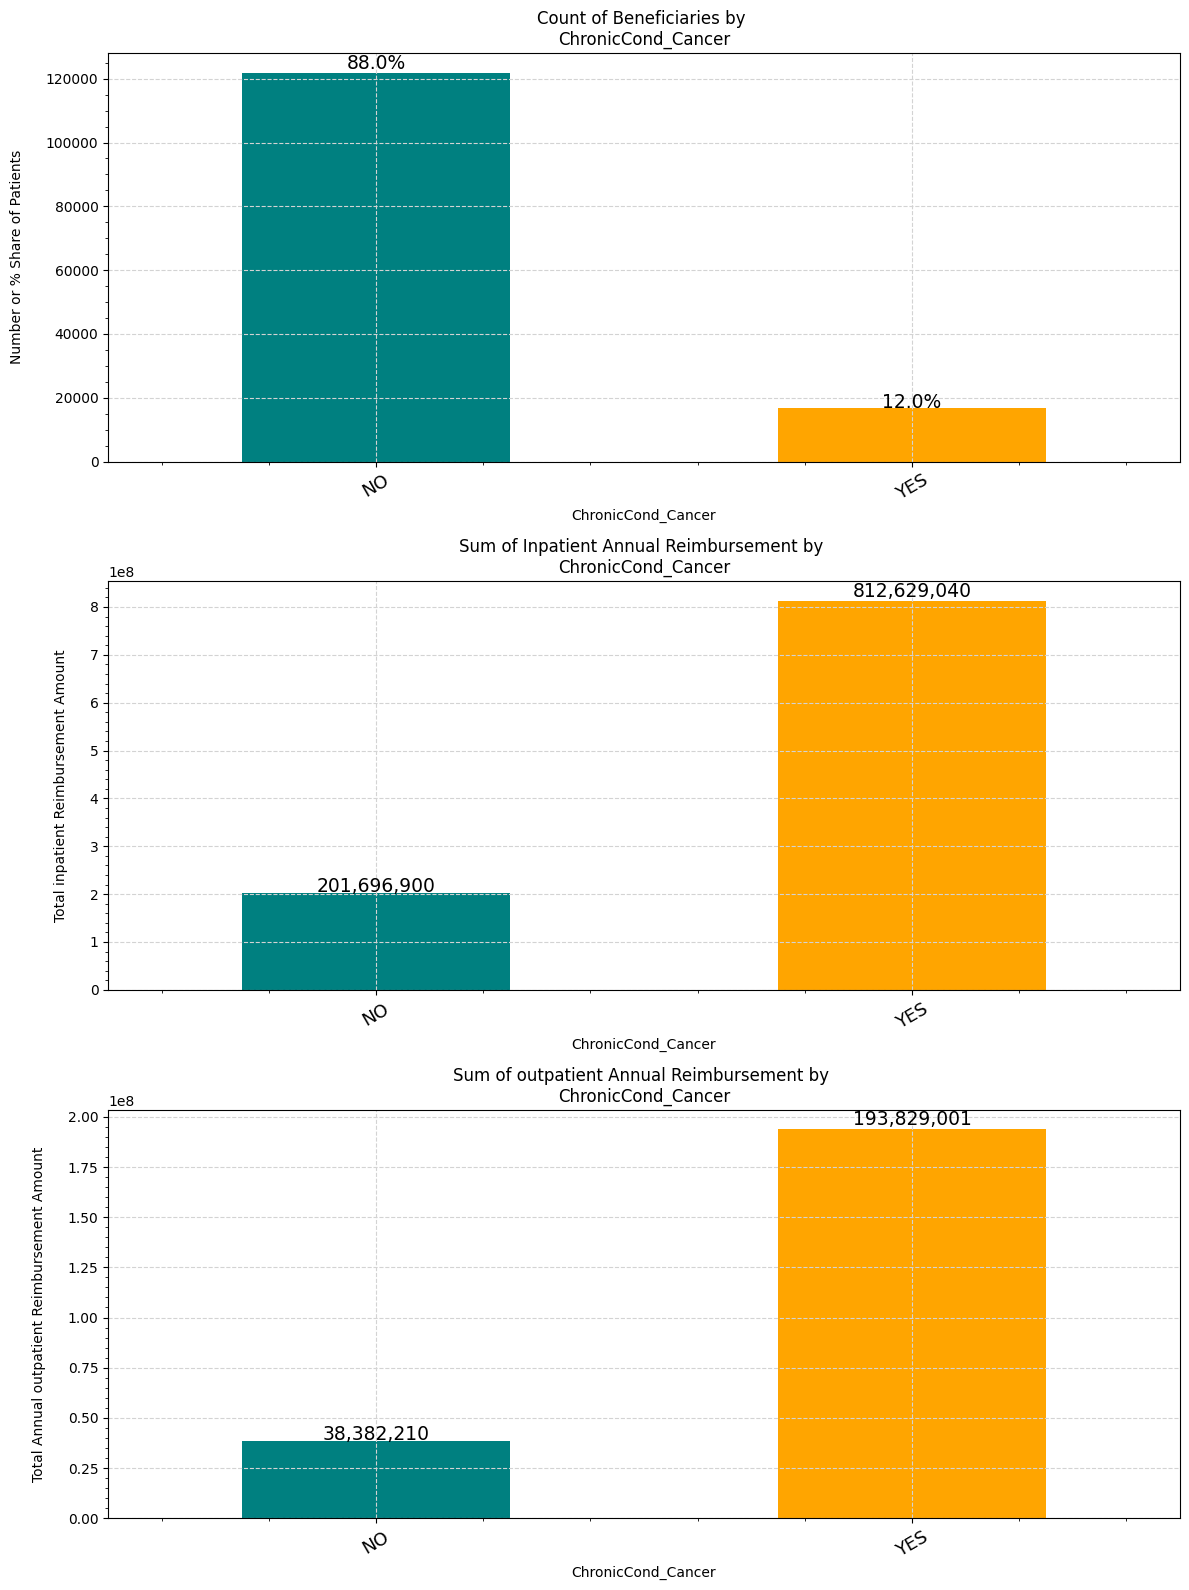

-0.25 0
0.75 0
                             count
ChronicCond_ObstrPulmonary        
2                           105697
1                            32859 



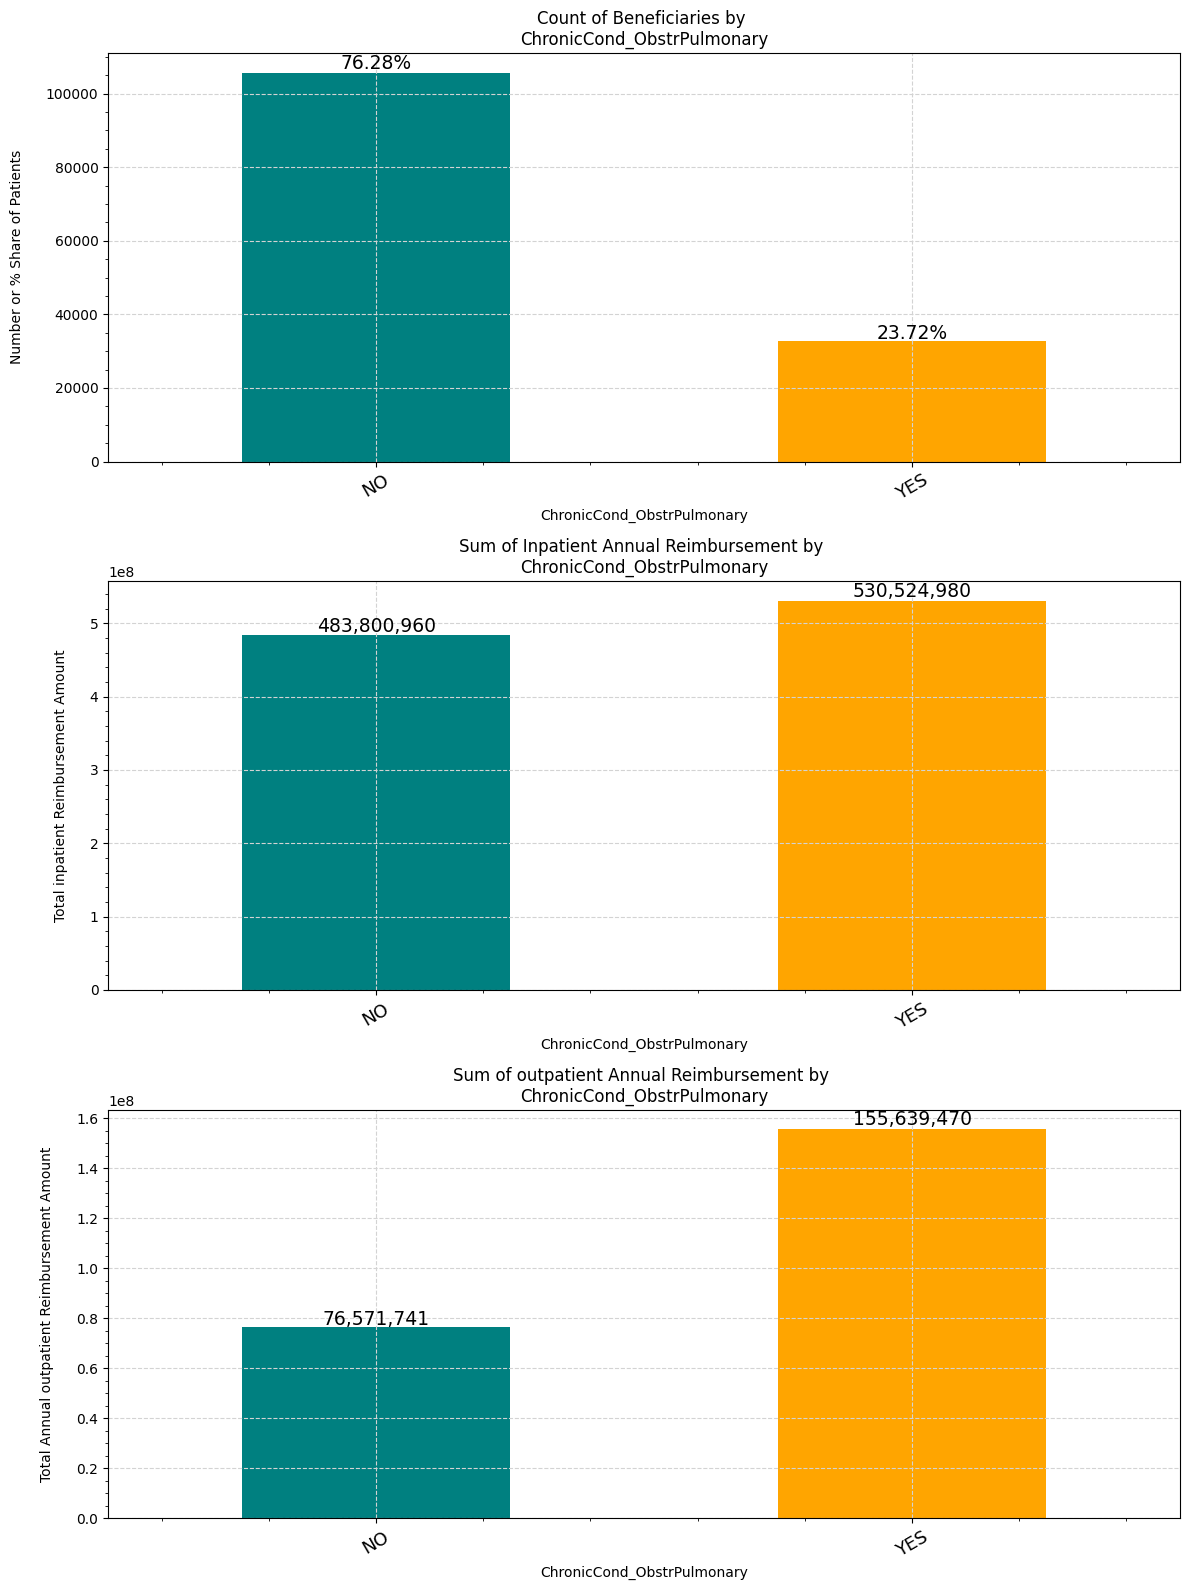

-0.25 0
0.75 0
                        count
ChronicCond_Depression       
2                       89296
1                       49260 



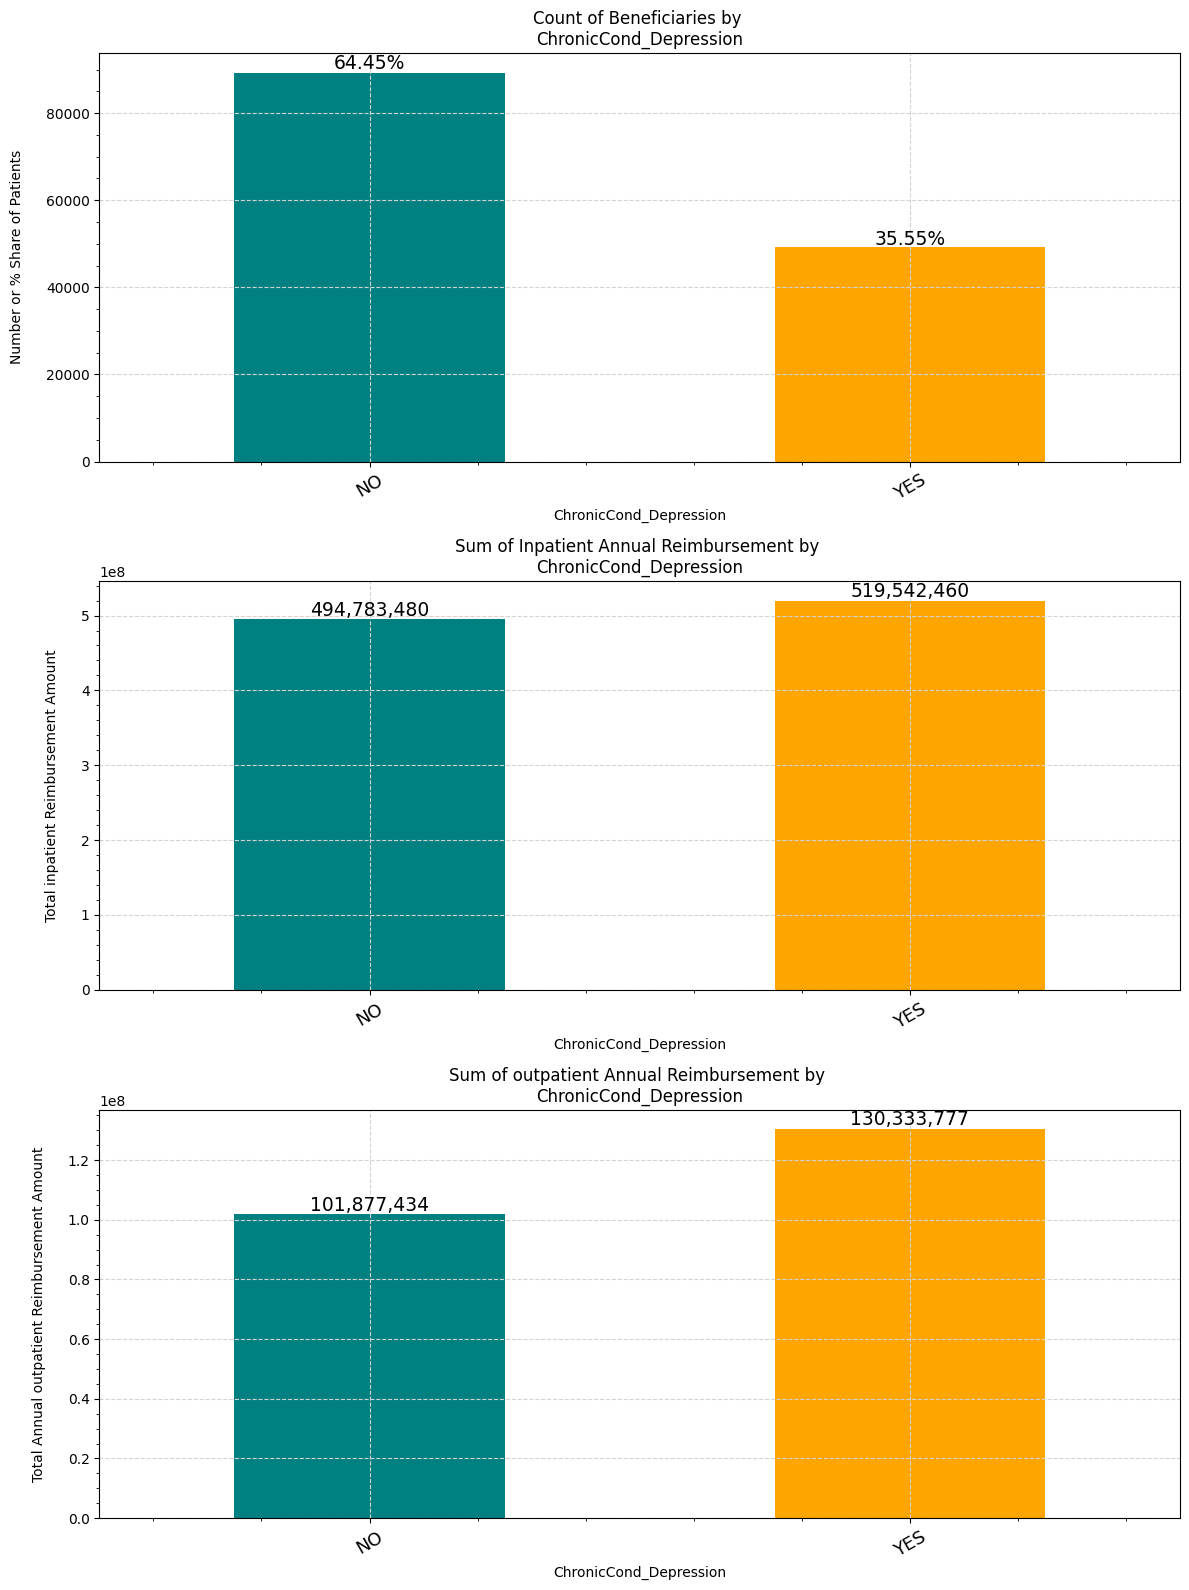

-0.25 0
0.75 0
                      count
ChronicCond_Diabetes       
1                     83391
2                     55165 



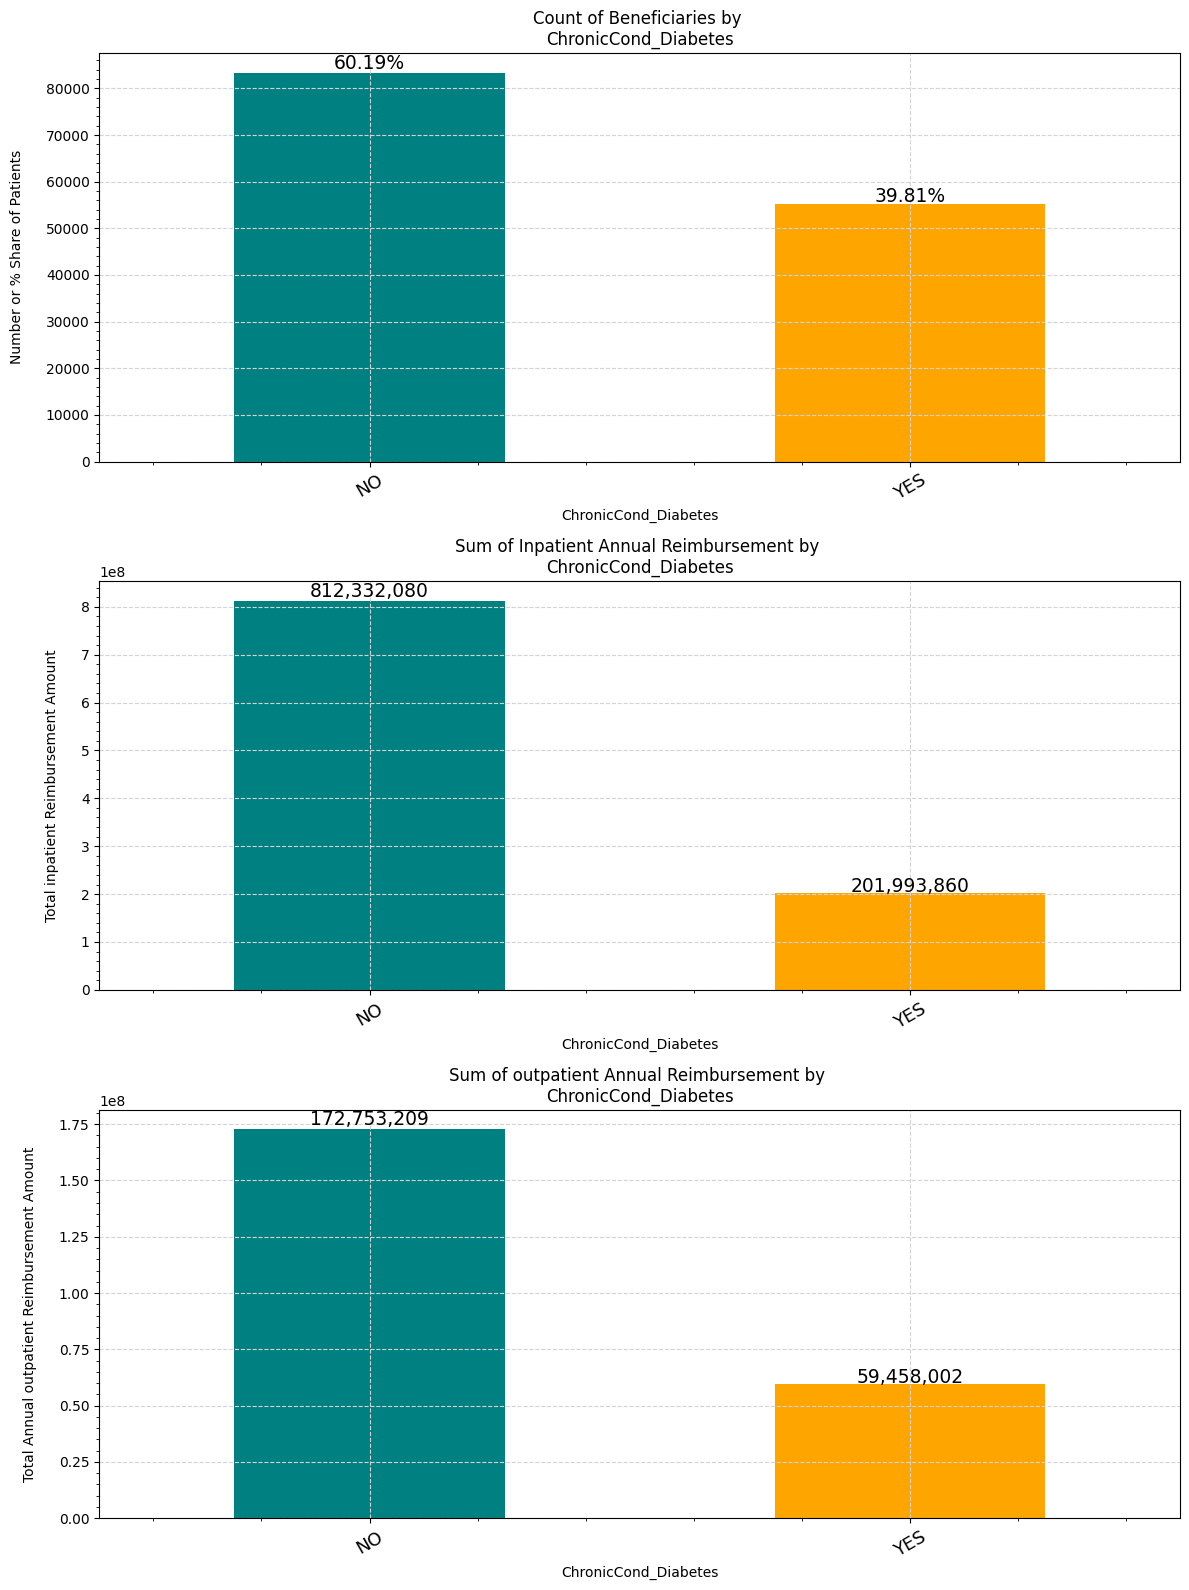

-0.25 0
0.75 0
                           count
ChronicCond_IschemicHeart       
1                          93644
2                          44912 



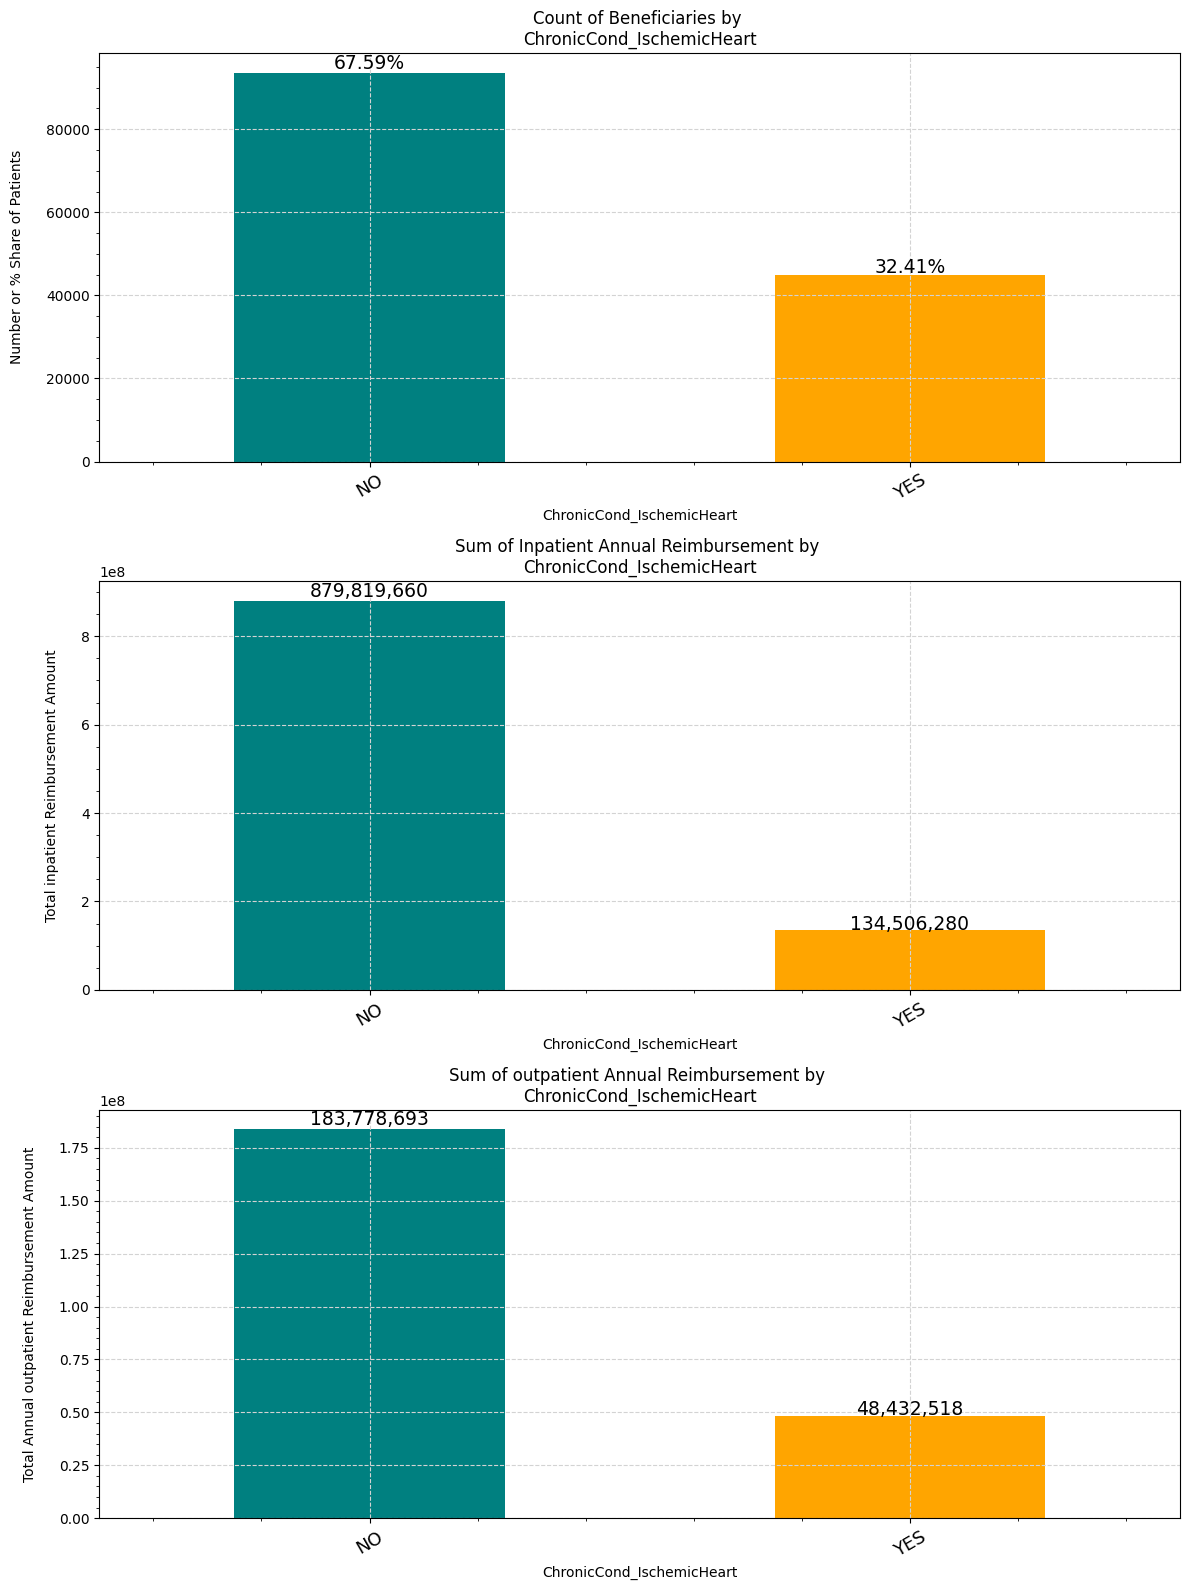

-0.25 0
0.75 0
                           count
ChronicCond_Osteoporasis        
2                         100497
1                          38059 



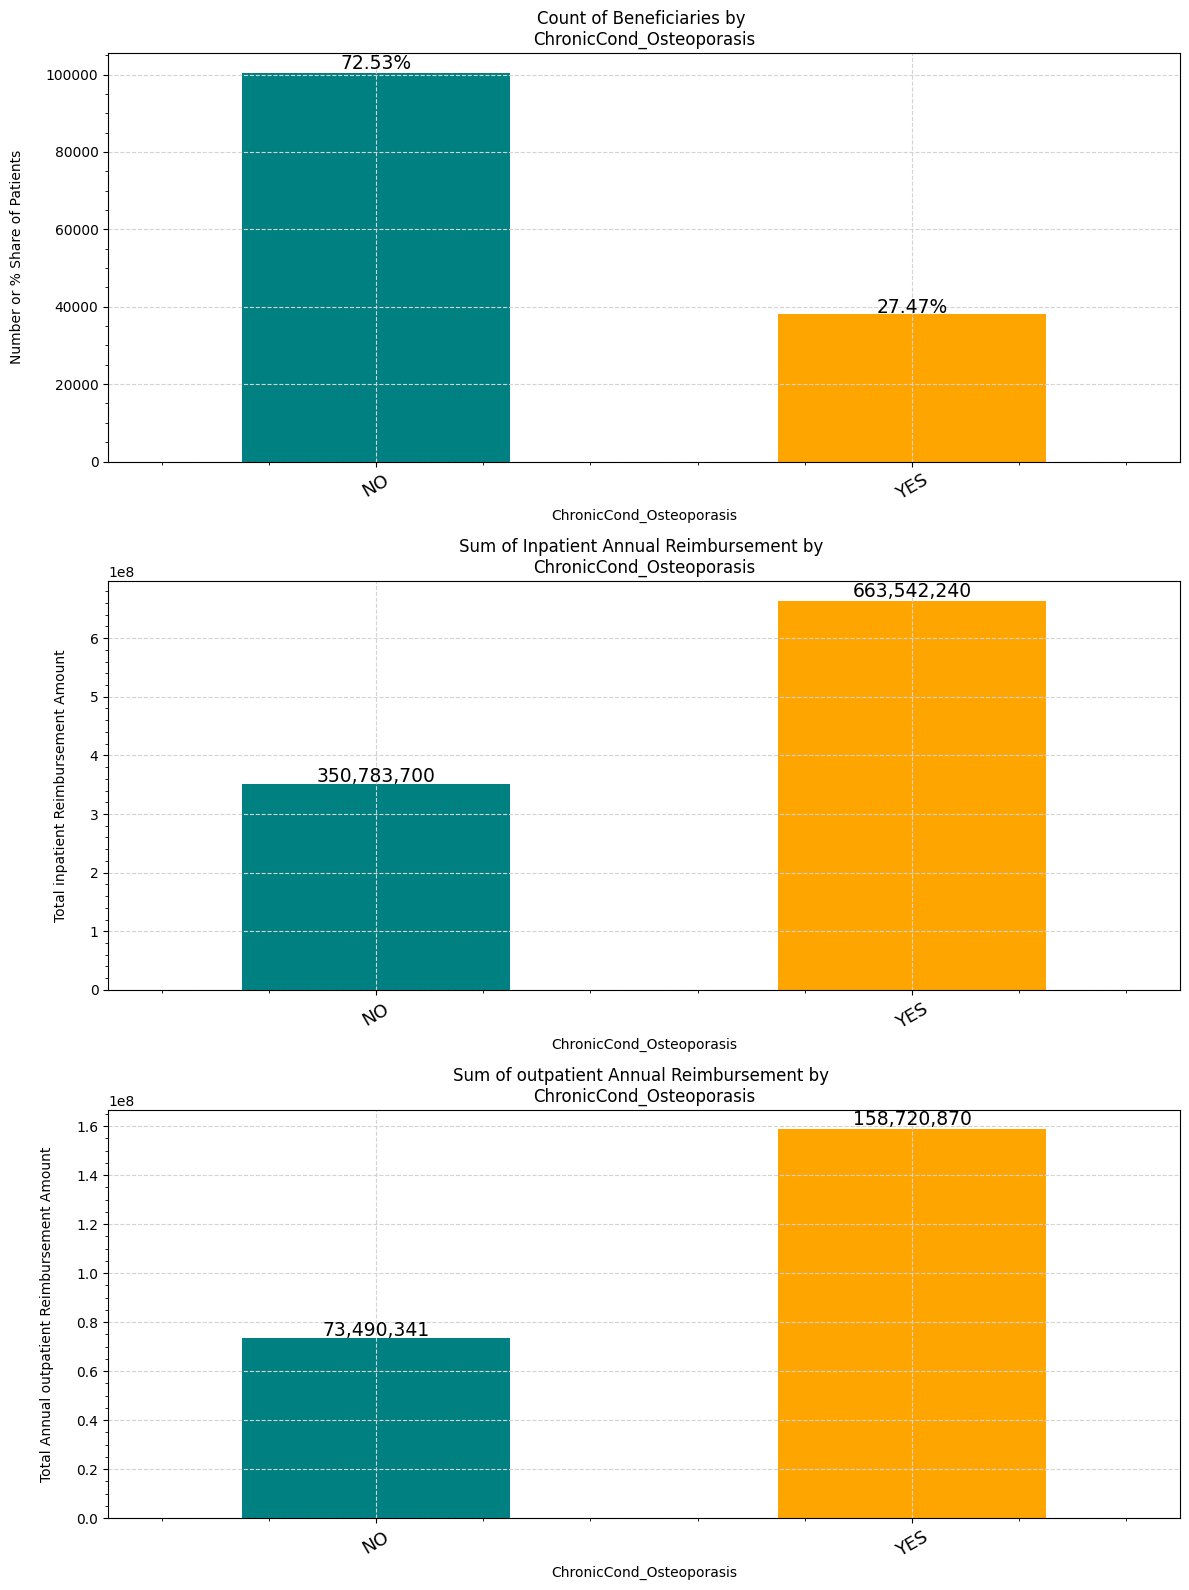

-0.25 0
0.75 0
                                  count
ChronicCond_rheumatoidarthritis        
2                                102972
1                                 35584 



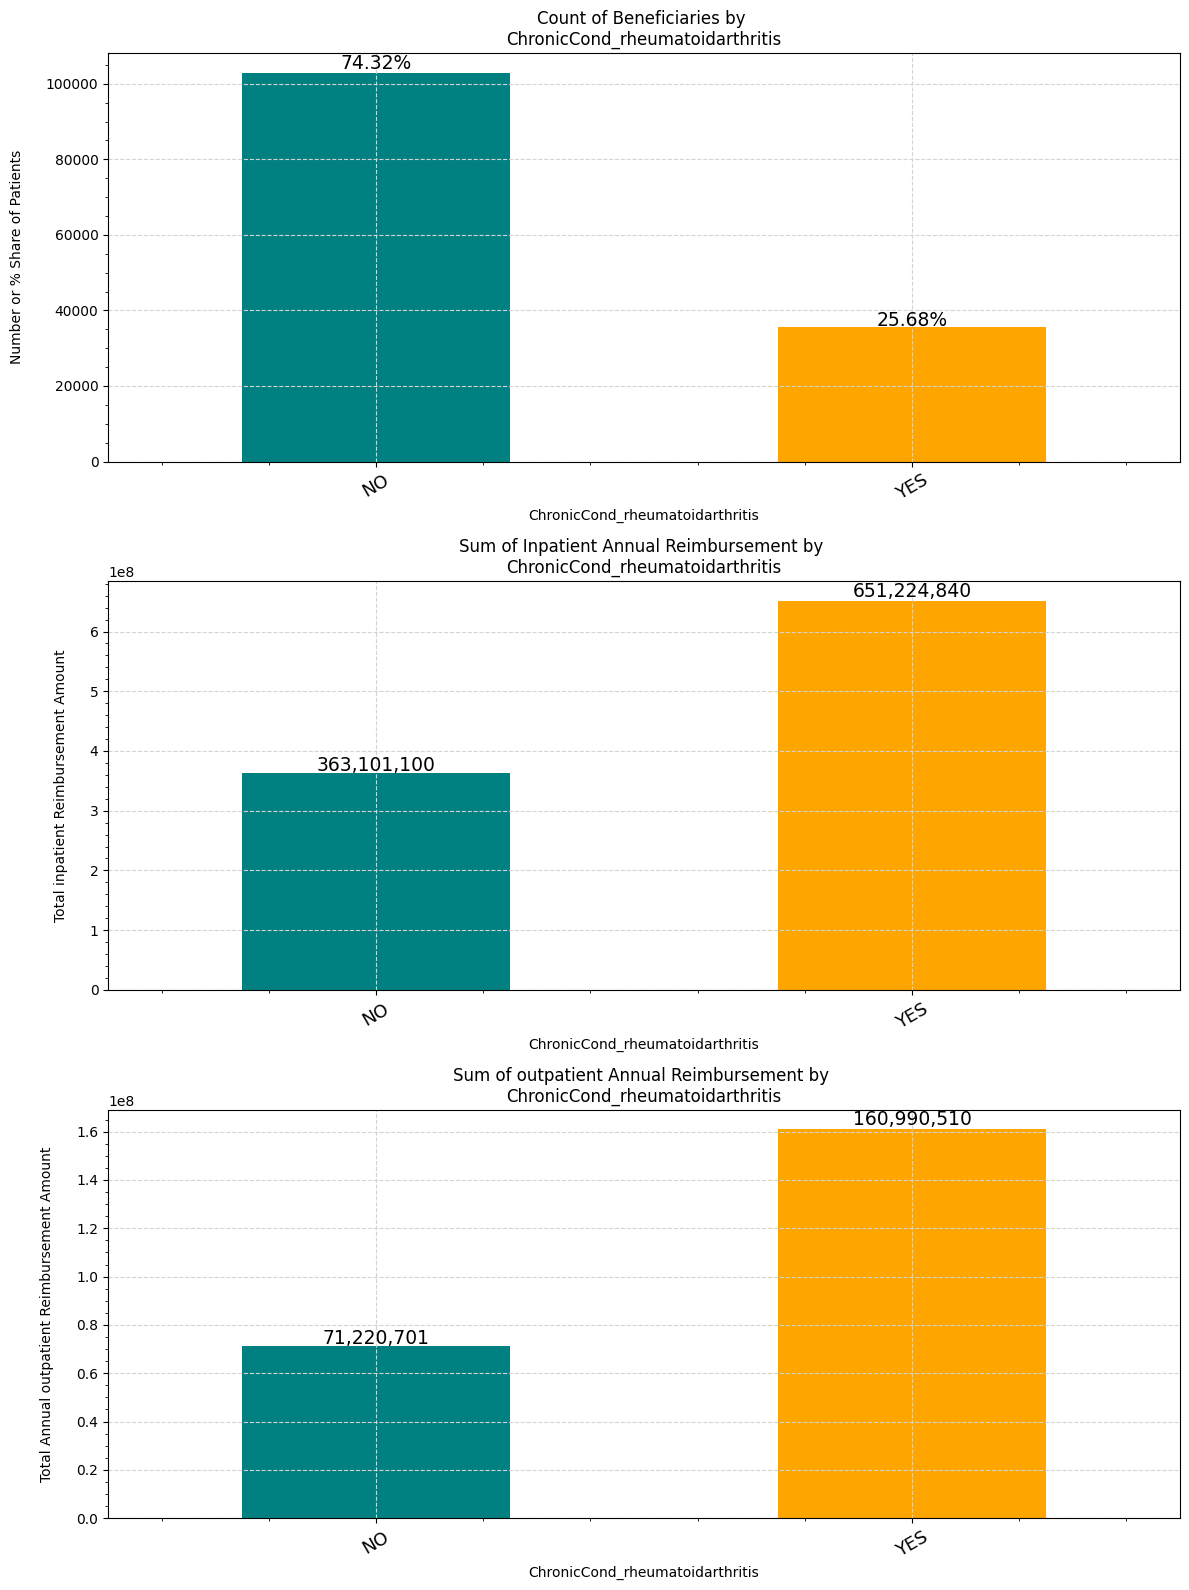

-0.25 0
0.75 0
                     count
ChronicCond_stroke        
2                   127602
1                    10954 



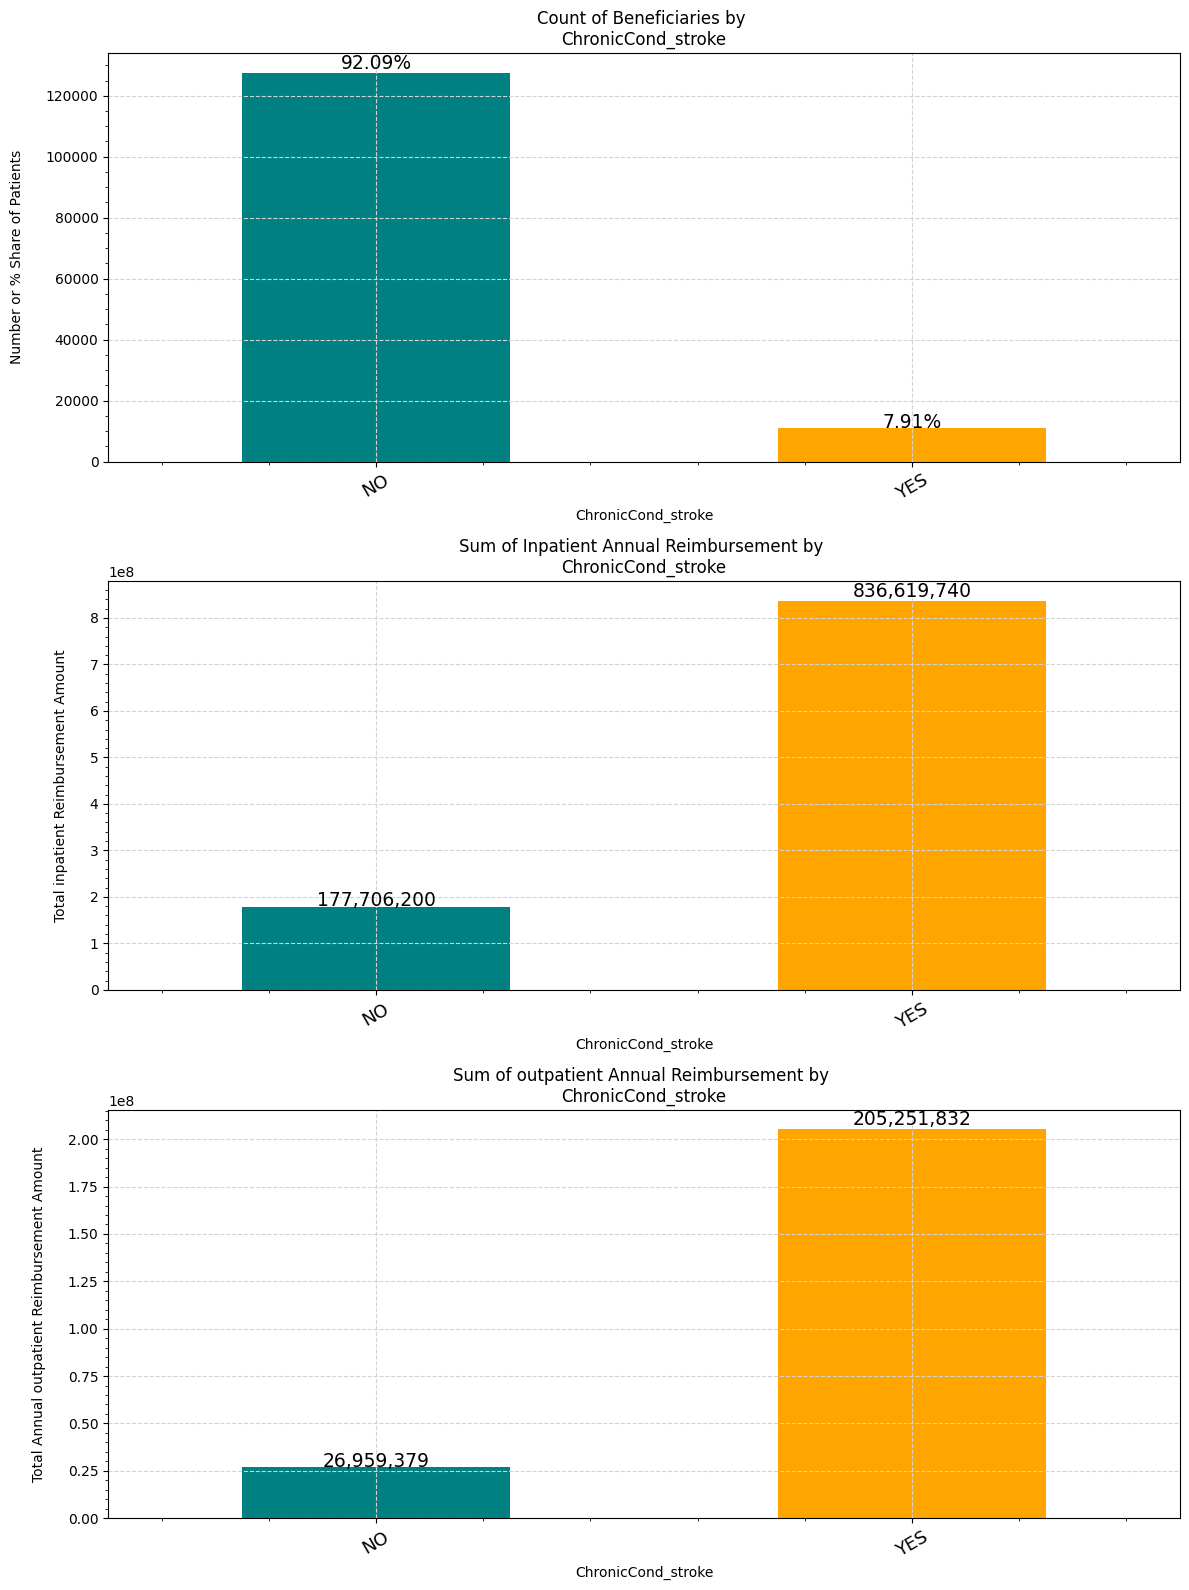

In [22]:
for i in ['RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']:
    plt.figure(figsize=(12, 16))

# Plot 1: Count of RenalDiseaseIndicator
    plt.subplot(3, 1, 1)  
    fig1 = df_ben_conv[i].value_counts().plot(kind='bar', color=['teal', 'orange'])
    plt.title("Count of Beneficiaries by \n" + i)

# Annotate bars for Plot 1
    for p in fig1.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig1.annotate(f'{str(round((height*100)/df_ben_conv.shape[0], 2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)

    plt.xlabel(i)
    plt.xticks(ticks=[0, 1], labels=['NO', 'YES'], fontsize=13, rotation=30)
    plt.ylabel("Number or % Share of Patients\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()

# Plot 1: Sum of IPAnnualReimbursementAmt by RenalDiseaseIndicator
    plt.subplot(3, 1, 2)  
    fig2 = df_ben_conv.groupby([i])['TotalIPAnnualAmt'].sum().plot(kind='bar', color=['teal', 'orange'])
    plt.title("Sum of Inpatient Annual Reimbursement by \n" +i)

# Annotate bars for Plot 1
    for p in fig2.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig2.annotate(f'{height:,.0f}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)

    plt.xlabel(i)
    plt.xticks(ticks=[0, 1], labels=['NO', 'YES'], fontsize=13, rotation=30)
    plt.ylabel("Total inpatient Reimbursement Amount\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()

# Plot 1: Sum of IPAnnualReimbursementAmt by RenalDiseaseIndicator
    plt.subplot(3, 1, 3)  
    fig3 = df_ben_conv.groupby([i])['TotalOPAnnualAmt'].sum().plot(kind='bar', color=['teal', 'orange'])
    plt.title("Sum of outpatient Annual Reimbursement by \n" +i)

# Annotate bars for Plot 3
    for p in fig3.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig3.annotate(f'{height:,.0f}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)

    plt.xlabel(i)
    plt.xticks(ticks=[0, 1], labels=['NO', 'YES'], fontsize=13, rotation=30)
    plt.ylabel("Total Annual outpatient Reimbursement Amount\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()

# Print the summary of the value counts
    print(pd.DataFrame(df_ben_conv[i].value_counts()), "\n")

# Display the plots
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

                       count
ChronicCond_Alzheimer       
2                      92530
1                      46026 



<Figure size 2000x2800 with 0 Axes>

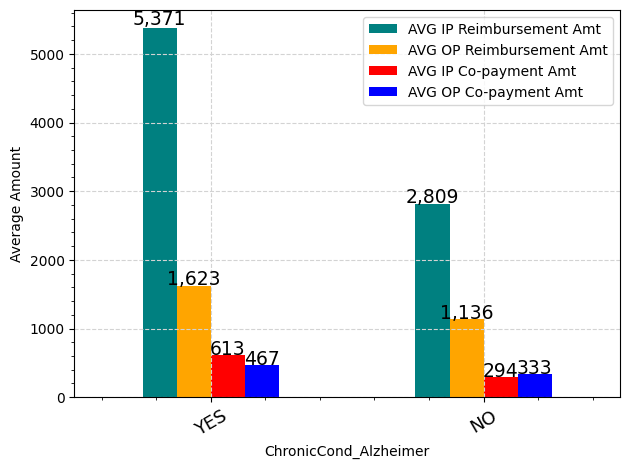

                          count
ChronicCond_Heartfailure       
2                         70154
1                         68402 



<Figure size 2000x2800 with 0 Axes>

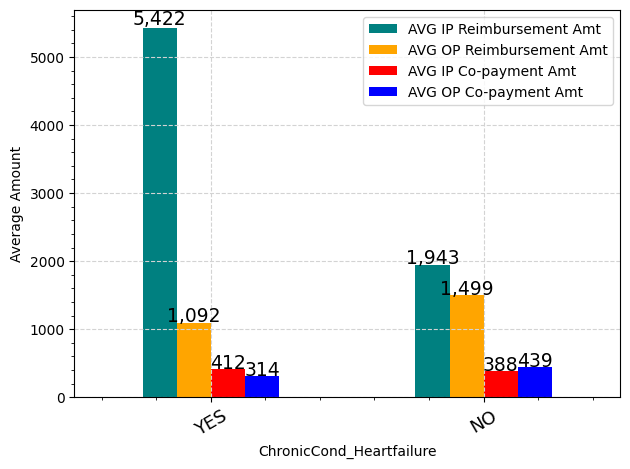

                           count
ChronicCond_KidneyDisease       
2                          95277
1                          43279 



<Figure size 2000x2800 with 0 Axes>

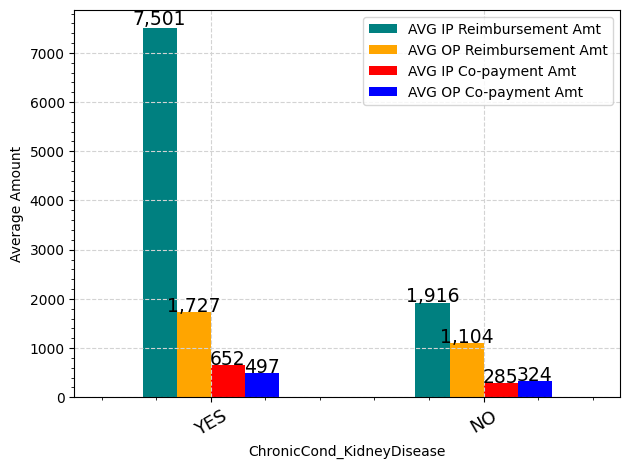

                     count
ChronicCond_Cancer        
2                   121935
1                    16621 



<Figure size 2000x2800 with 0 Axes>

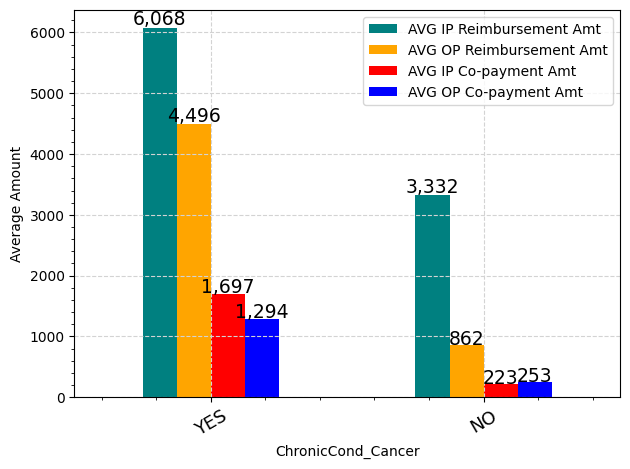

                             count
ChronicCond_ObstrPulmonary        
2                           105697
1                            32859 



<Figure size 2000x2800 with 0 Axes>

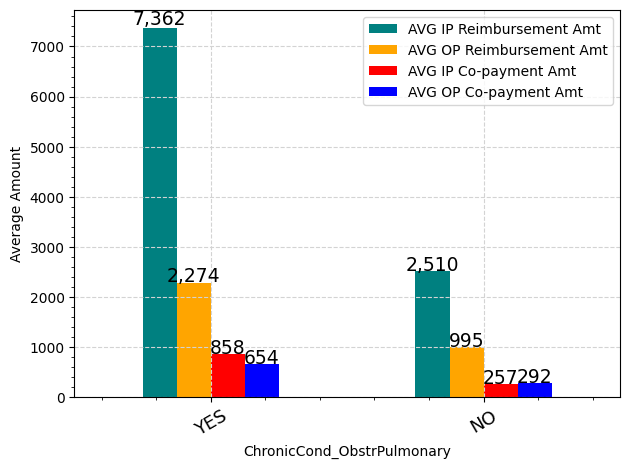

                        count
ChronicCond_Depression       
2                       89296
1                       49260 



<Figure size 2000x2800 with 0 Axes>

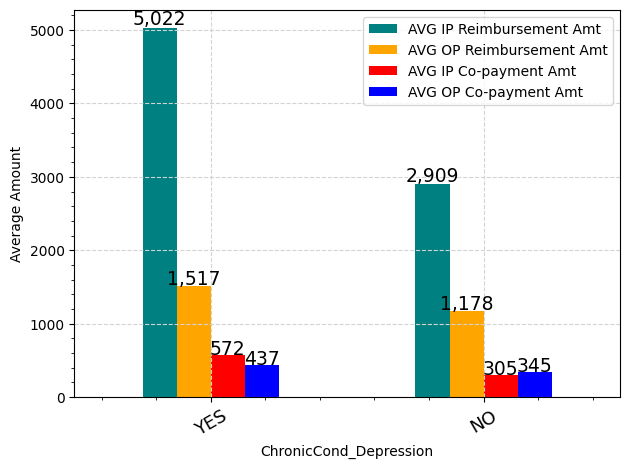

                      count
ChronicCond_Diabetes       
1                     83391
2                     55165 



<Figure size 2000x2800 with 0 Axes>

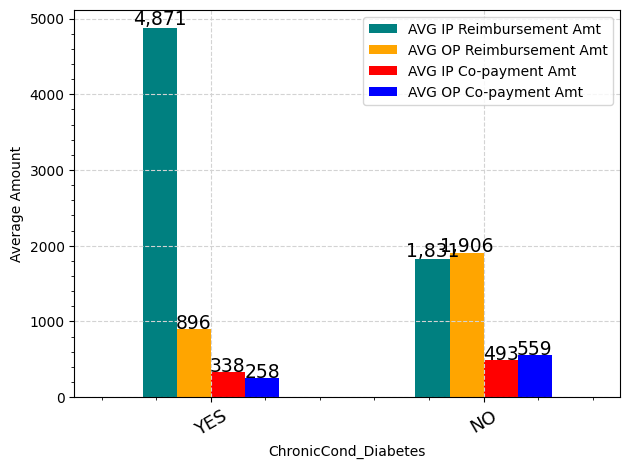

                           count
ChronicCond_IschemicHeart       
1                          93644
2                          44912 



<Figure size 2000x2800 with 0 Axes>

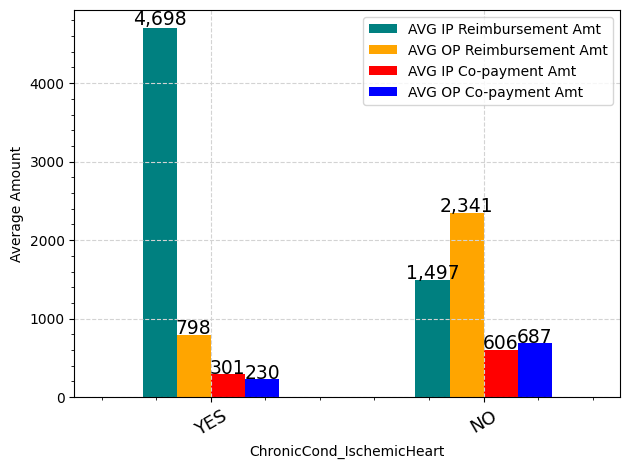

                           count
ChronicCond_Osteoporasis        
2                         100497
1                          38059 



<Figure size 2000x2800 with 0 Axes>

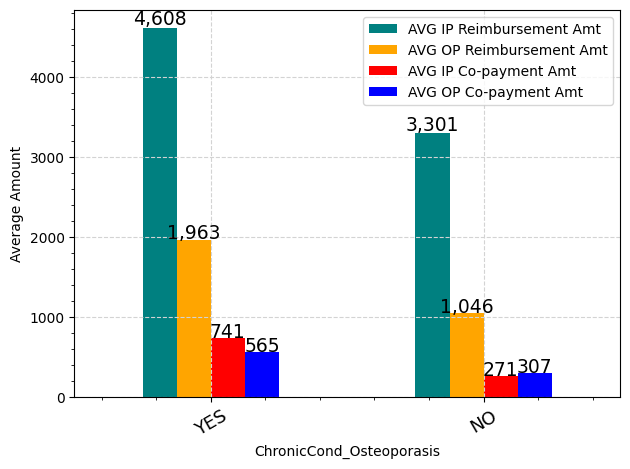

                                  count
ChronicCond_rheumatoidarthritis        
2                                102972
1                                 35584 



<Figure size 2000x2800 with 0 Axes>

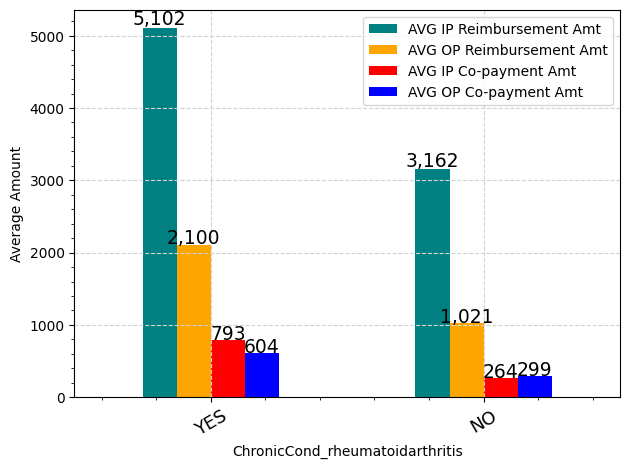

                     count
ChronicCond_stroke        
2                   127602
1                    10954 



<Figure size 2000x2800 with 0 Axes>

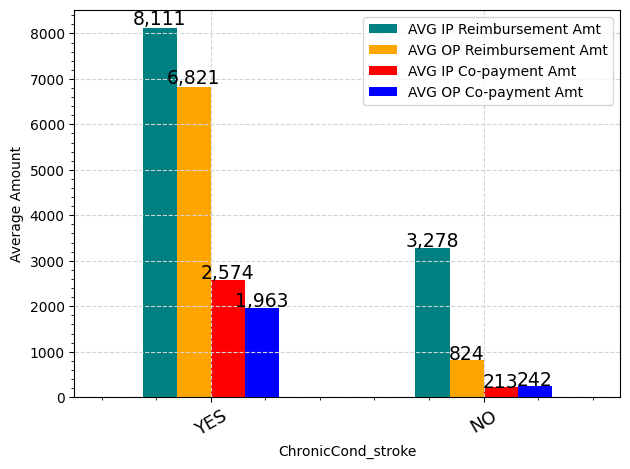

In [6]:
for i in ['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']:
    plt.figure(figsize=(20, 28))


# Plot 1: Sum of IPAnnualReimbursementAmt by RenalDiseaseIndicator
      
    CC_ALZH_IP_R = pd.DataFrame(df_ben_conv.groupby([i])['IPAnnualReimbursementAmt'].sum() / df_ben_conv.groupby([i])['BeneID'].count())
    CC_ALZH_IP_R.columns = ['AVG IP Reimbursement Amt']
    CC_ALZH_OP_R = pd.DataFrame(df_ben_conv.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum() / df_ben_conv.groupby([i])['BeneID'].count())
    CC_ALZH_OP_R.columns = ['AVG OP Reimbursement Amt']
    CC_ALZH_IP_D = pd.DataFrame(df_ben_conv.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum() / df_ben_conv.groupby([i])['BeneID'].count())
    CC_ALZH_IP_D.columns = ['AVG IP Co-payment Amt']
    CC_ALZH_OP_D = pd.DataFrame(df_ben_conv.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum() / df_ben_conv.groupby([i])['BeneID'].count())
    CC_ALZH_OP_D.columns = ['AVG OP Co-payment Amt']
    CC_ALZH_all_amts = pd.concat([CC_ALZH_IP_R, CC_ALZH_OP_R, CC_ALZH_IP_D, CC_ALZH_OP_D], axis=1)
    fig = CC_ALZH_all_amts.plot(kind='bar', color=['teal', 'orange','red','blue'])

# Annotate bars for Plot 1
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{height:,.0f}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)

    plt.xlabel(i)
    plt.xticks(ticks=[0, 1], labels=['YES', 'NO'], fontsize=13, rotation=30)
    plt.ylabel("Average Amount")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()

# Print the summary of the value counts
    print(pd.DataFrame(df_ben_conv[i].value_counts()), "\n")

# Display the plots
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

- Beneficiaries get  a higher proportion of their treatment charges reimbursed by the health insurance firm.This is specially the case when a condition exist.

2. What proportion of beneficiaries have renal condition and then kidney failure. 

                     count
ChronicCond_stroke        
2                   127602
1                    10954 



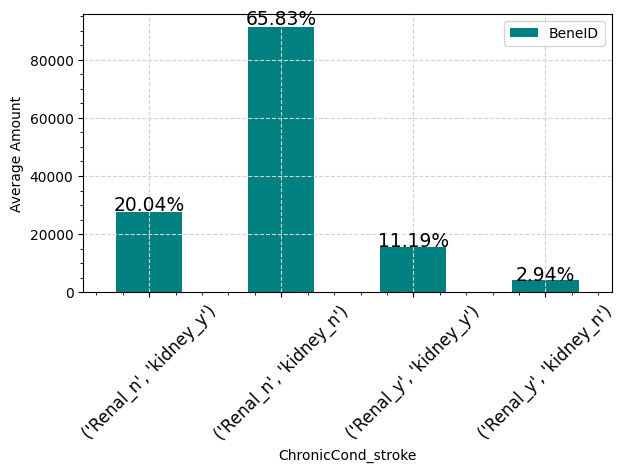

In [7]:
# Plot 1: Sum of IPAnnualReimbursementAmt by RenalDiseaseIndicator
df_conv=pd.DataFrame(df_ben_conv.groupby(['RenalDiseaseIndicator','ChronicCond_KidneyDisease'])['BeneID'].count())
fig = df_conv.plot(kind='bar', color=['teal', 'orange'])

# Annotate bars for Plot 1
for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/df_ben_conv.shape[0],2))+"%"}', (x + width/2, y + height*1.01), ha='center', fontsize=13.5, rotation=0)


plt.xlabel(i)
plt.xticks(labels=[("Renal_n","kidney_y"), ("Renal_n","kidney_n"), ("Renal_y","kidney_y"), ("Renal_y","kidney_n")], ticks=[0,1,2,3], rotation=45, size=12)
plt.ylabel("Average Amount")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()

# Print the summary of the value counts
print(pd.DataFrame(df_ben_conv[i].value_counts()), "\n")

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Q3. What is the percentile distribution of inpatient reimbursement amount for each disease?

In [8]:
def percentile_data_vis(x,y,disease_filter,title):
    percentiles=[]
    percentile_vals=[]
    for val in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.94,0.95,0.96]:
        percentile = round(float(val*100),6)
        percentiles.append(percentile)
        percentile_val=round(df_ben_conv[df_ben_conv[x]==disease_filter][y].quantile(val),1)
        percentile_vals.append(percentile_val)
        tmp_percentiles = pd.DataFrame([percentiles, percentile_vals]).T
        tmp_percentiles.columns=['Percentiles', 'Values']
    plt.figure(figsize=(15,7))
    sns.pointplot(data=tmp_percentiles, x='Percentiles', y='Values', hue='Percentiles',legend=False, markers="o", palette='spring')
    sns.pointplot(data=tmp_percentiles, x='Percentiles', y='Values',markers="", color='grey', linestyles="solid")
        # Providing the labels and title to the graph
    plt.xlabel("\nPercentiles")
    plt.xticks(rotation=90, size=12)
    plt.ylabel("Total Annual `{}` Sum \n".format(y))
    plt.grid(which='major', linestyle="-.", color='black')
    plt.title("Percentile for {}".format(title))
    plt.minorticks_on()
       
        
    return tmp_percentiles



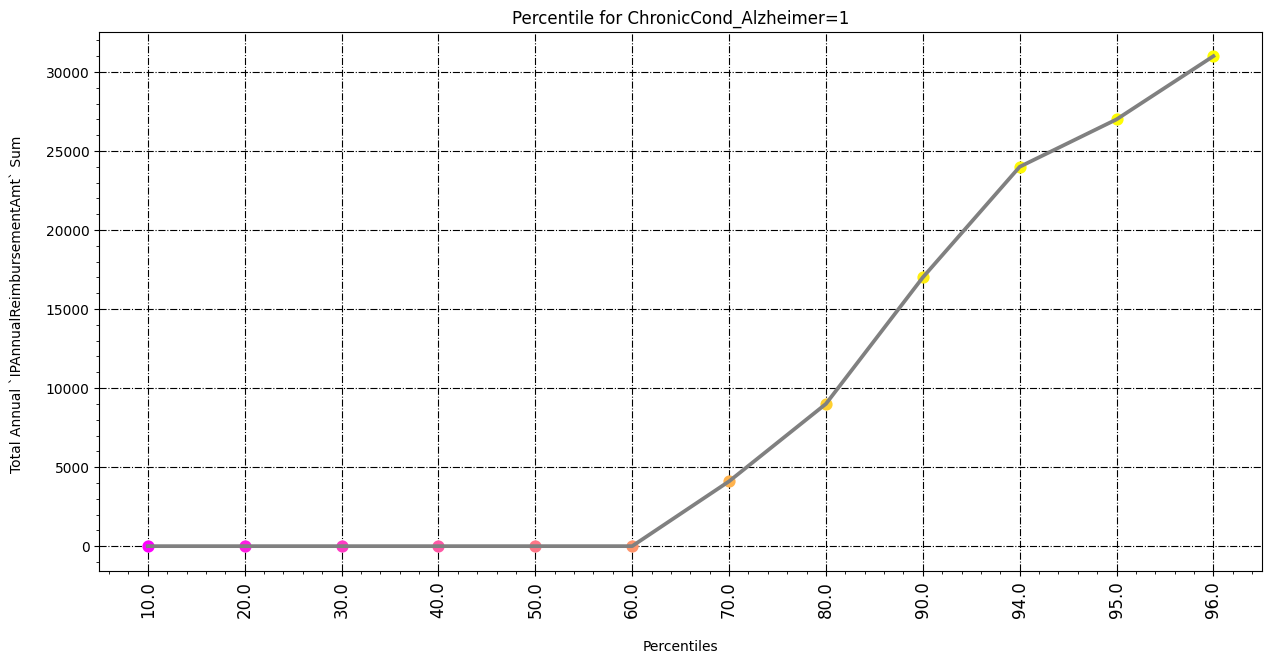

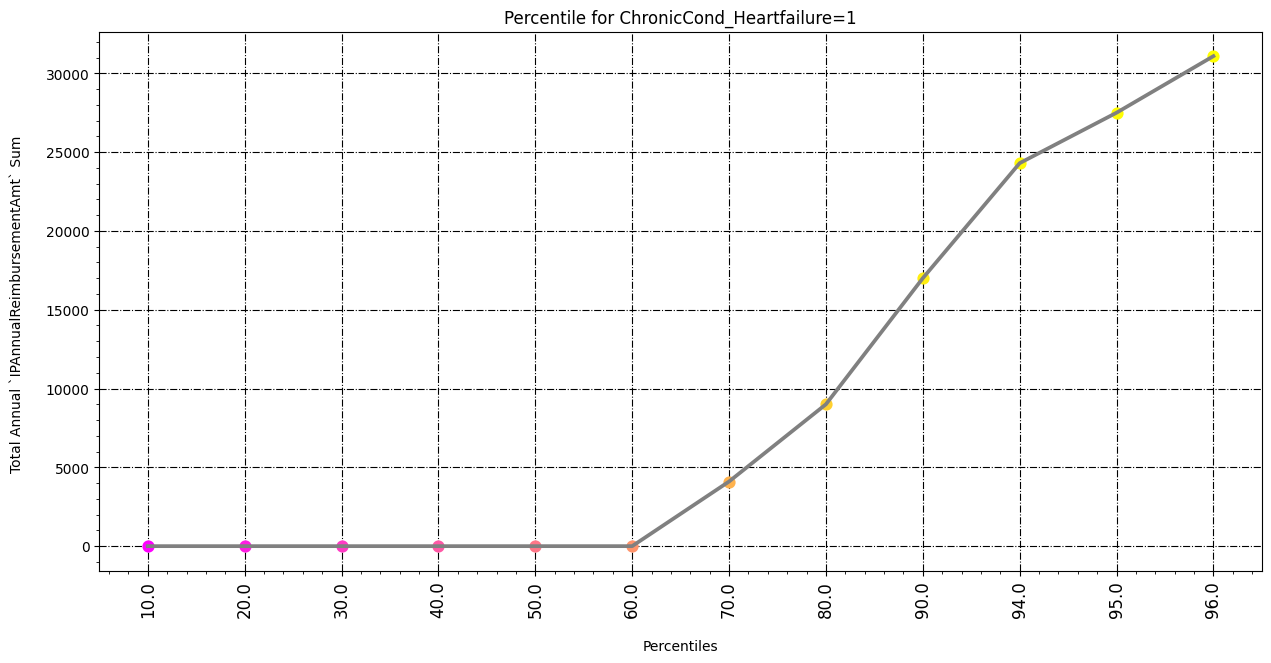

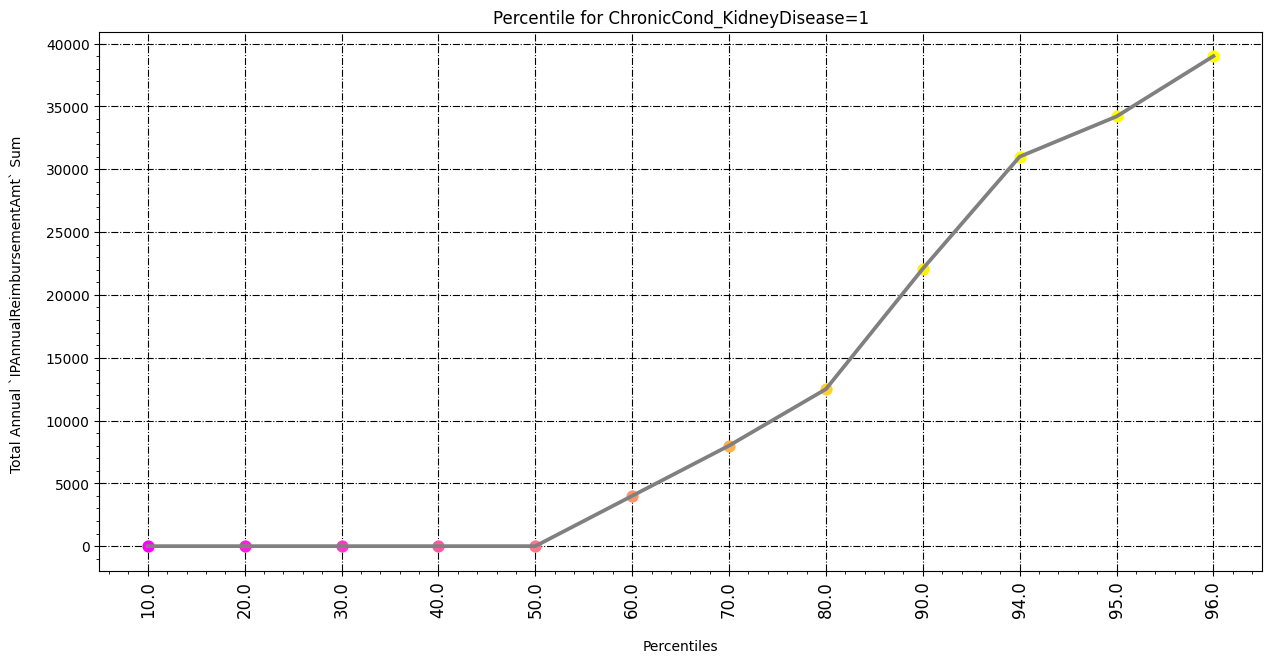

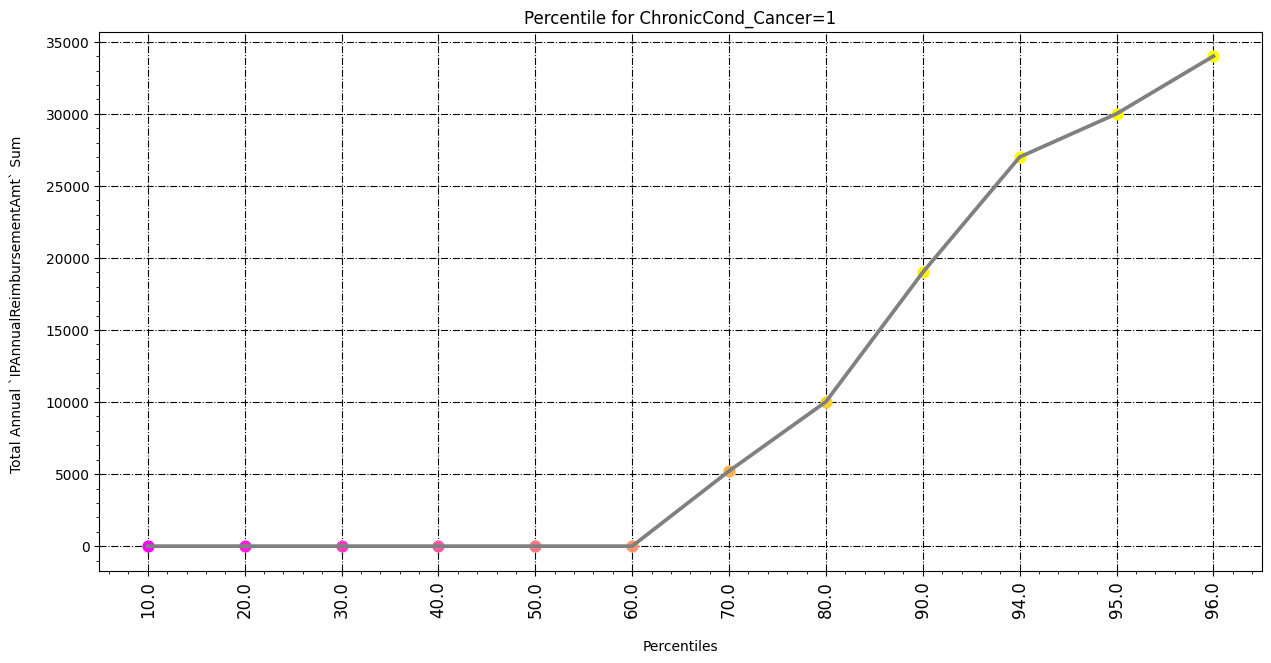

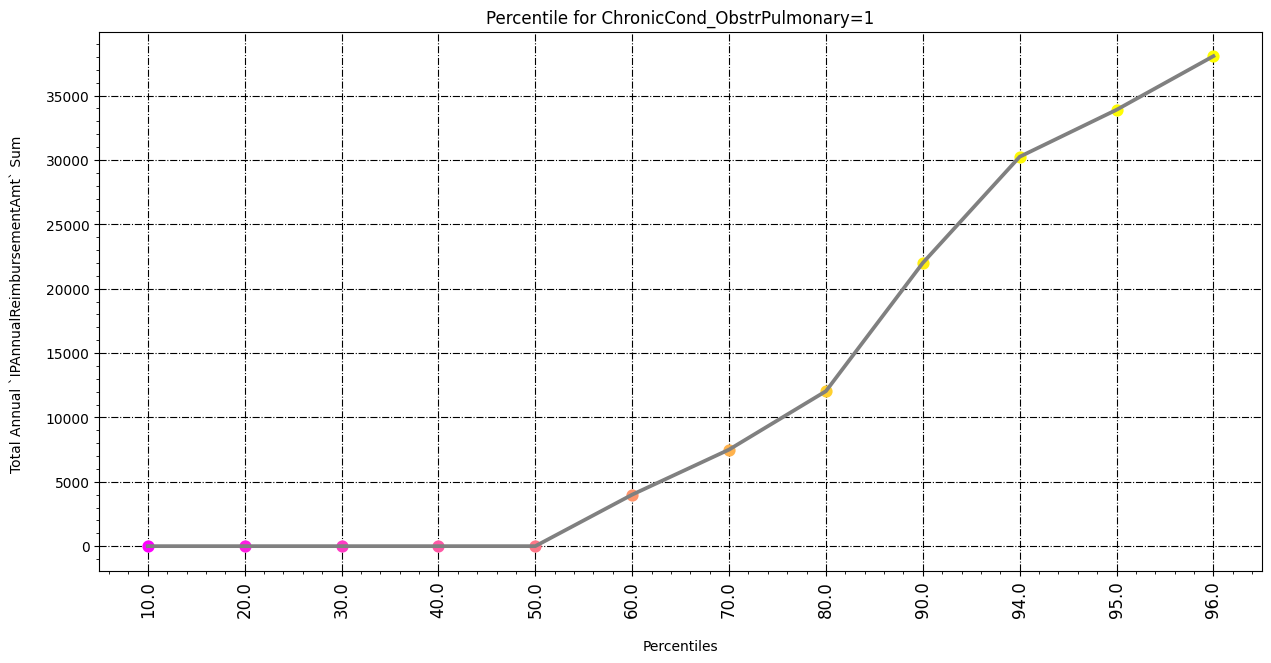

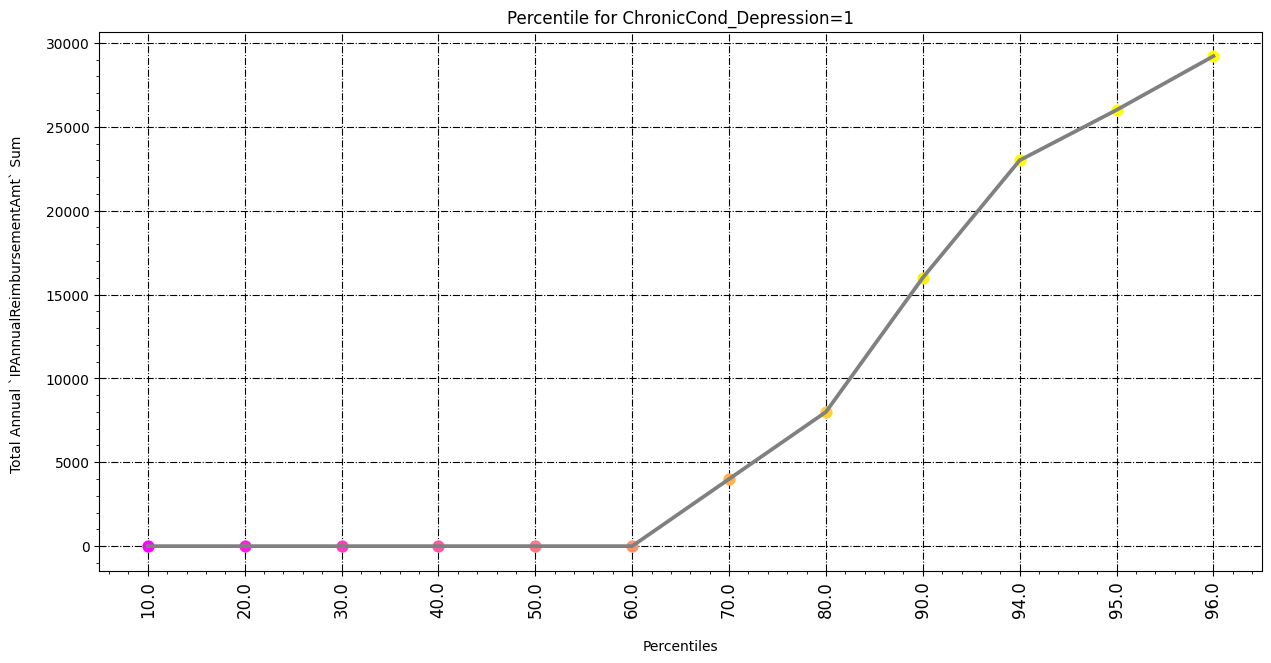

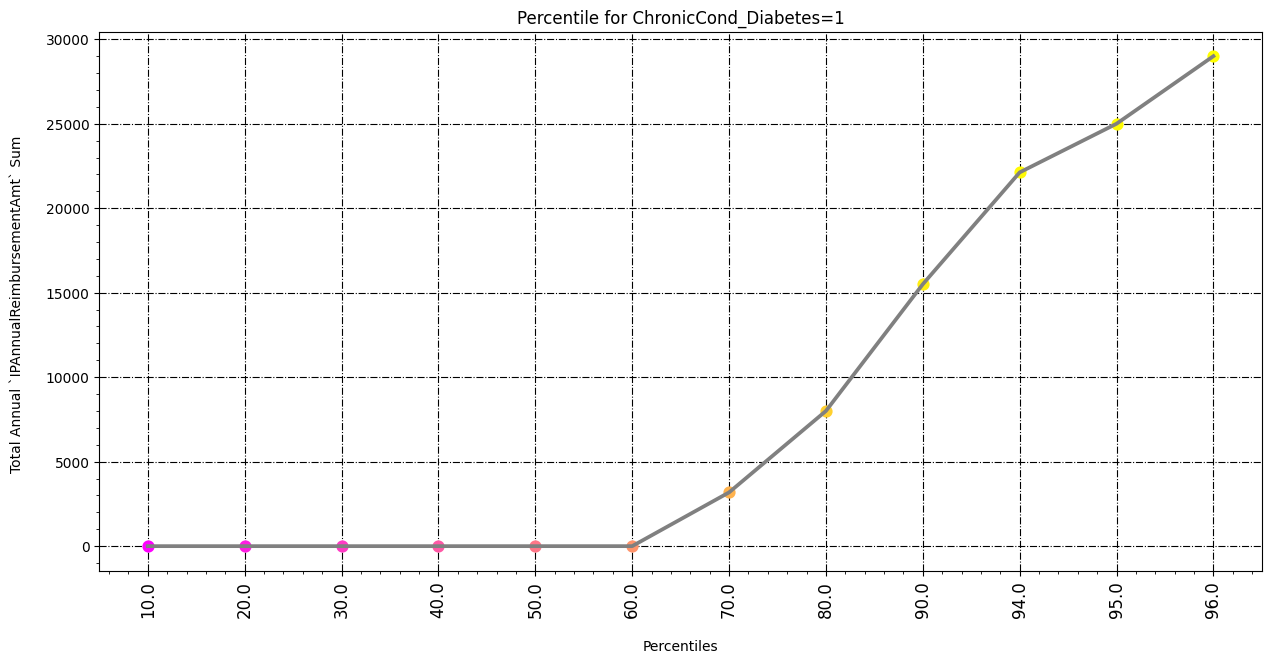

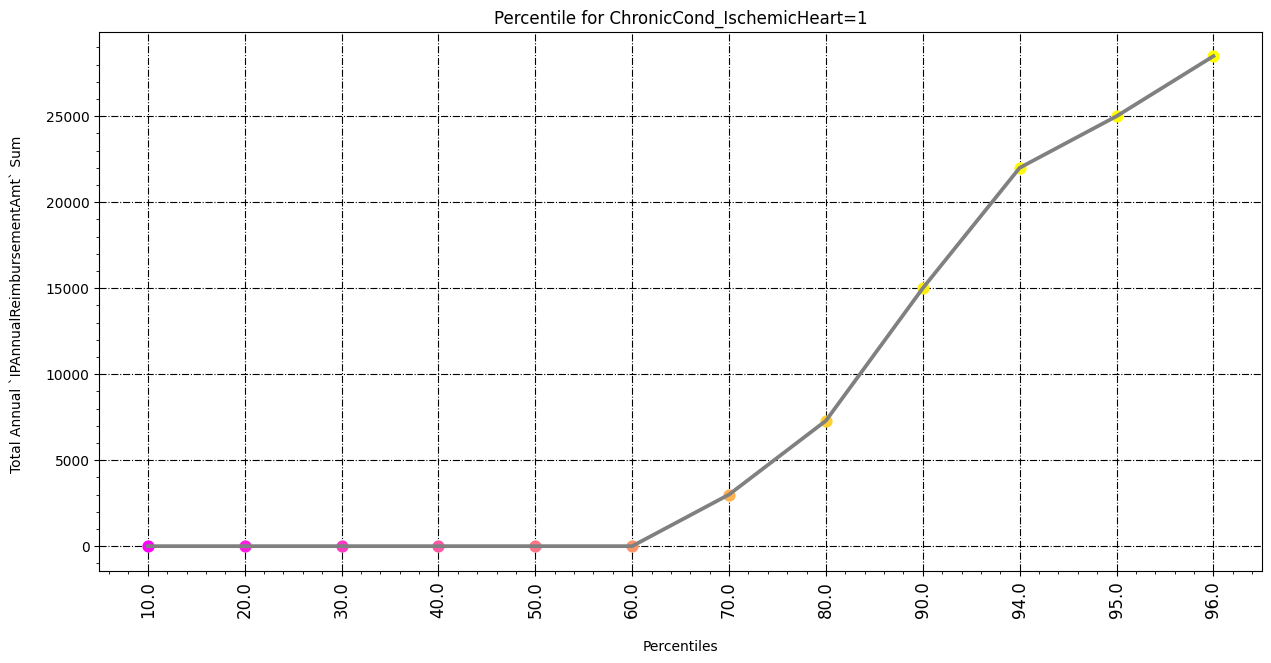

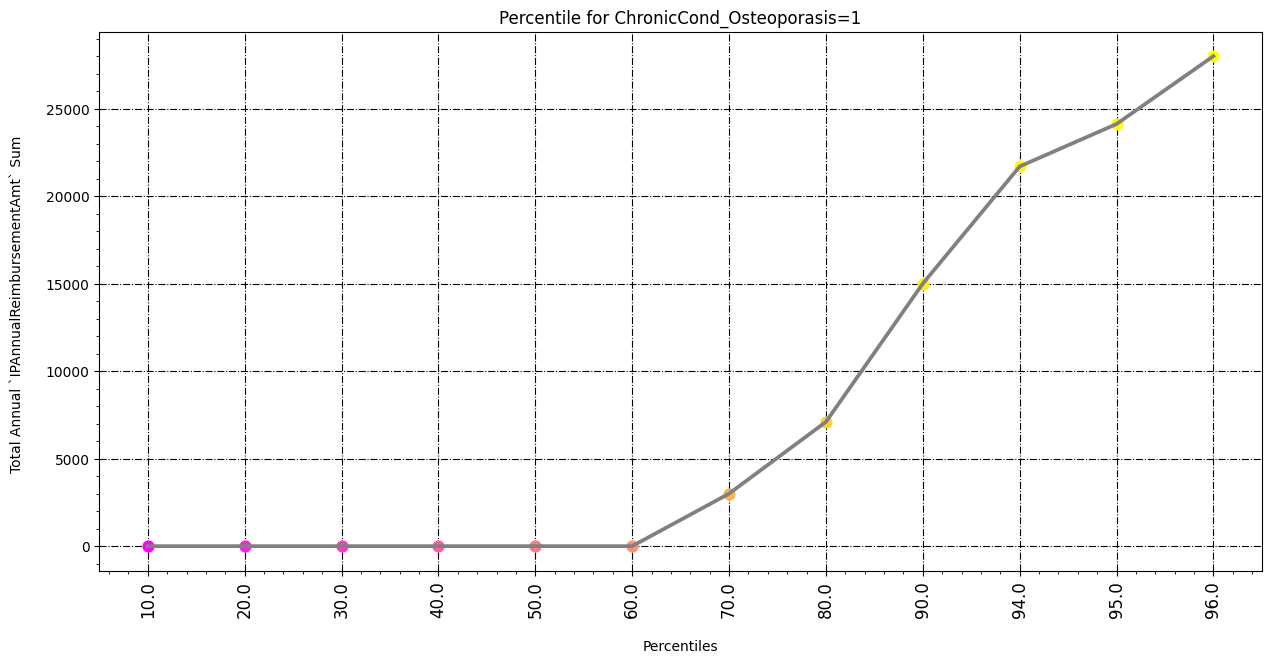

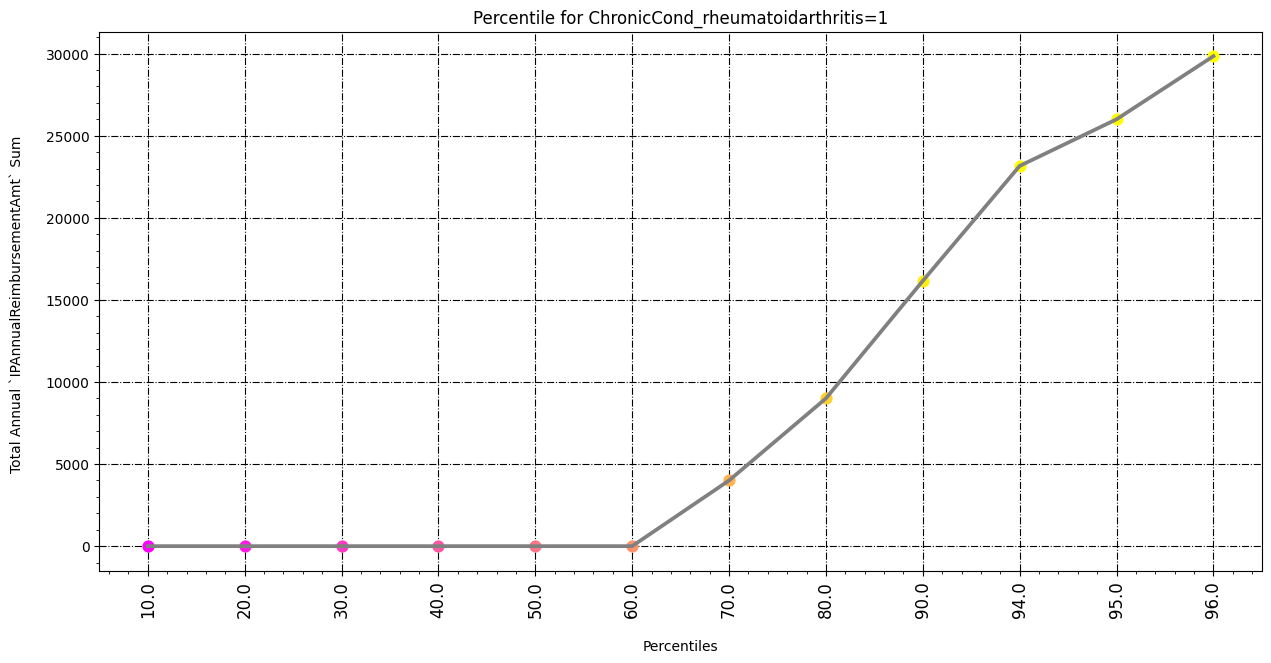

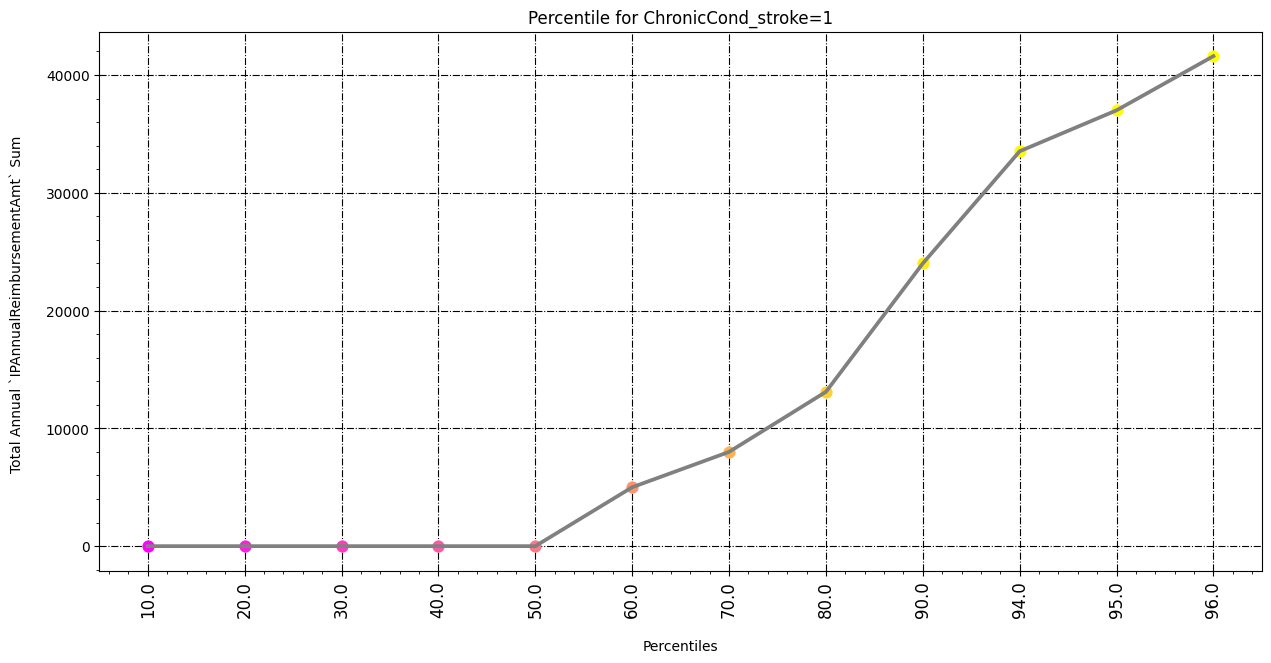

In [14]:
for i in ['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']:
    percentile_data_vis(i,'IPAnnualReimbursementAmt','1',i+"=1")

There has been a high variance in inpatient reimbursement amount for every disease provided. This signifies outliers which could be potential fraudulent claims by providers.

In [1]:
def plot_strip_plots(x_col, hue_col, y_col, lgd_title):
    """
    Description : This function is created for plotting the spread of data points of pre-disease indicators for the Annual IP and OP expenditures
    across males and females.
    
    Input: It accepts below parameters:
        1. x_col : Gender feature.
        2. hue_Col : Pre-Disease indicator
        3. y_col : Feature like re-imbursement or deductible amount whose percentiles you want to generate.
        4. lgd_title : Category code for which you want to generate the data spread.
        
    Output: It displays the stipplot graph of the same.
    """
    
    plt.figure(figsize=(10,7))
    sns.stripplot(data=df_ben_conv, x=x_col, y=y_col, hue=hue_col, palette='plasma')
        # Providing the labels and title to the graph
    plt.xlabel("\n{}".format(x_col))
    plt.xticks(rotation=90, size=12)
    plt.ylabel("{}\n".format(y_col))
    plt.grid(which='major', linestyle="-.", color='lightpink')
    plt.minorticks_on()
    plt.title("Spread of payment paid by payer\n")
    plt.legend(loc='upper center',title=lgd_title)

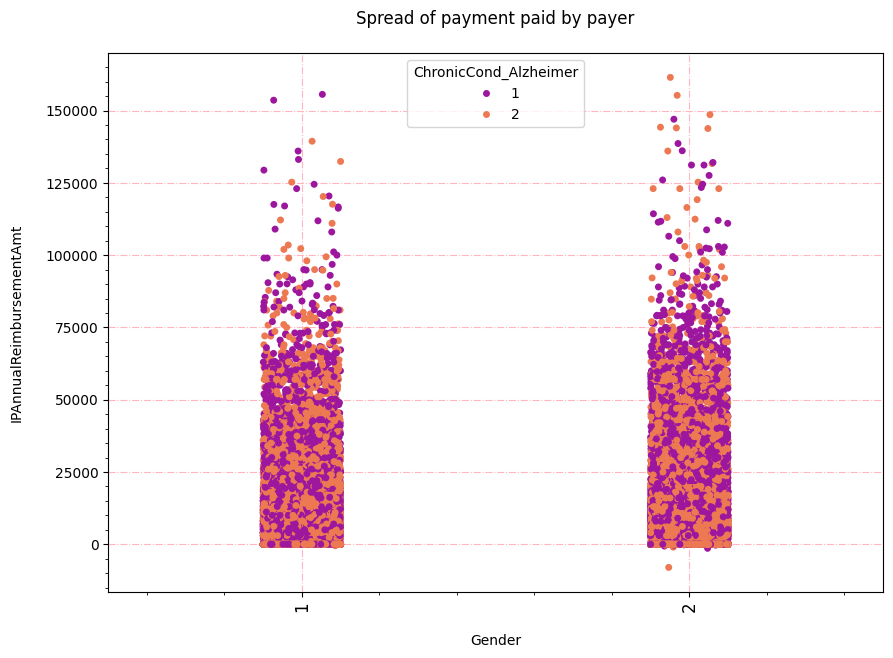

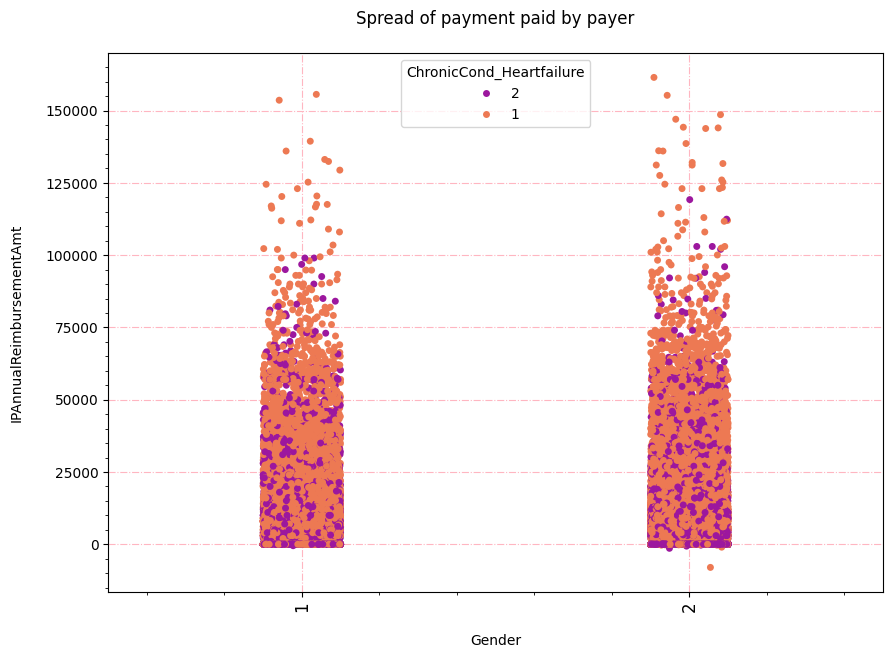

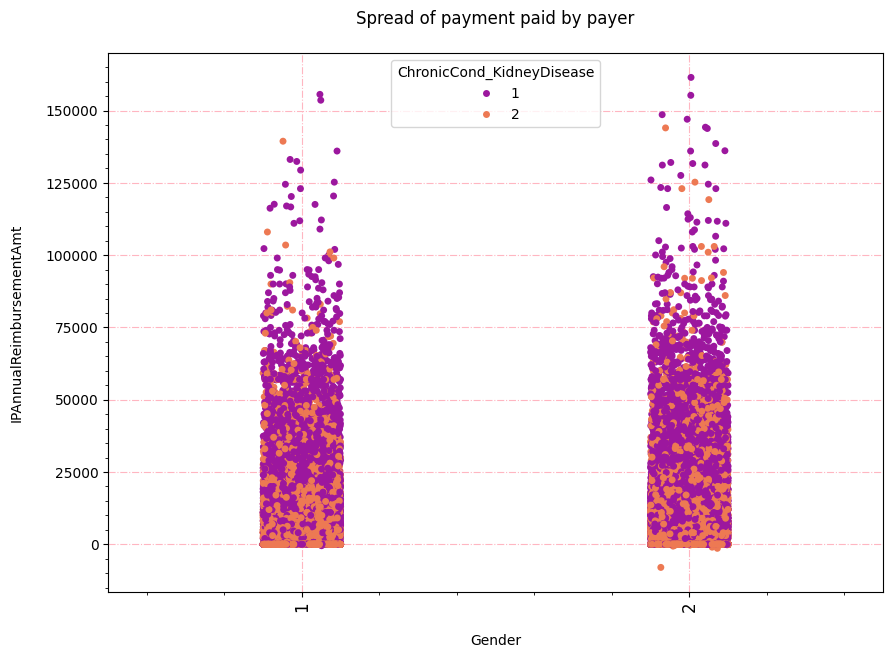

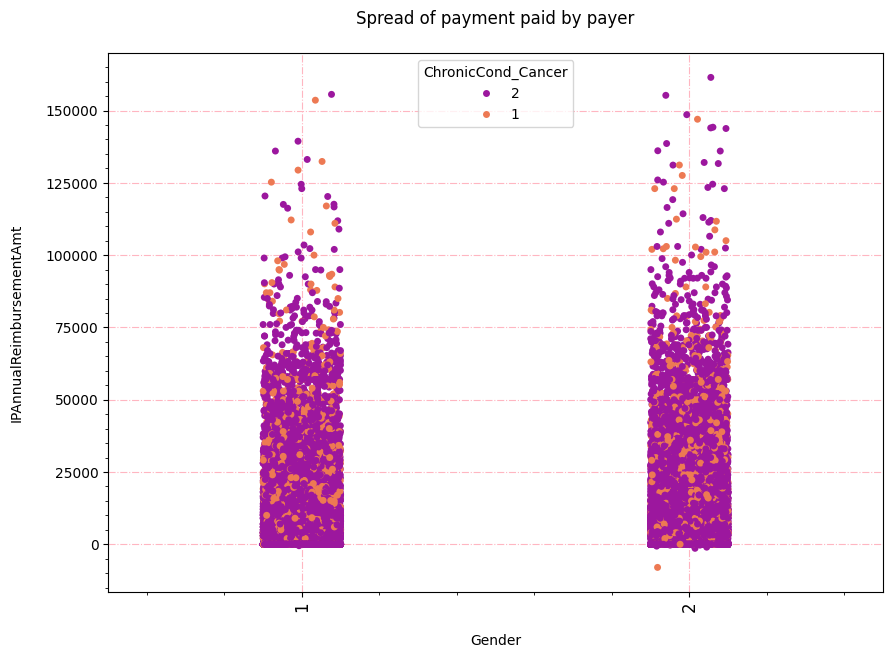

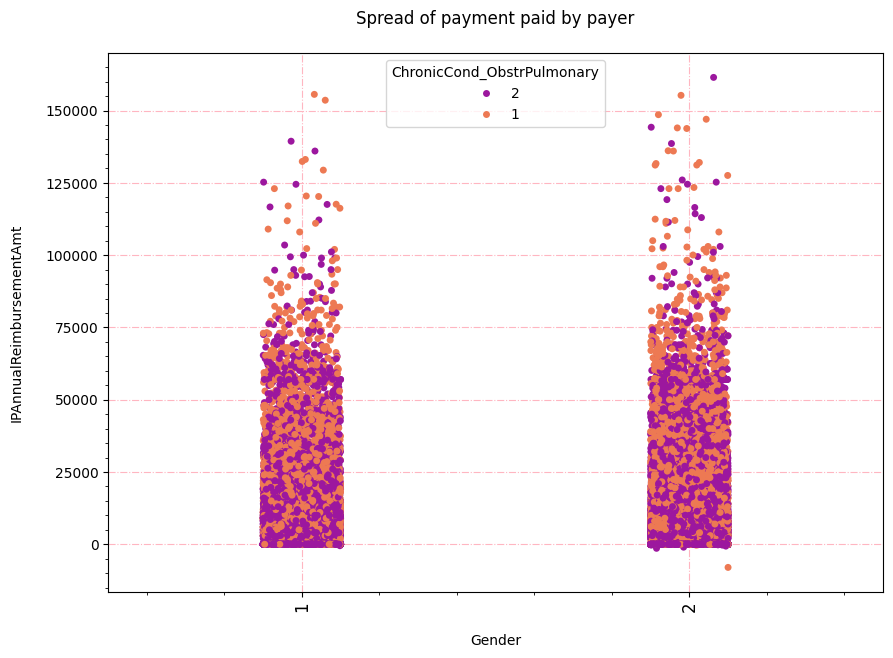

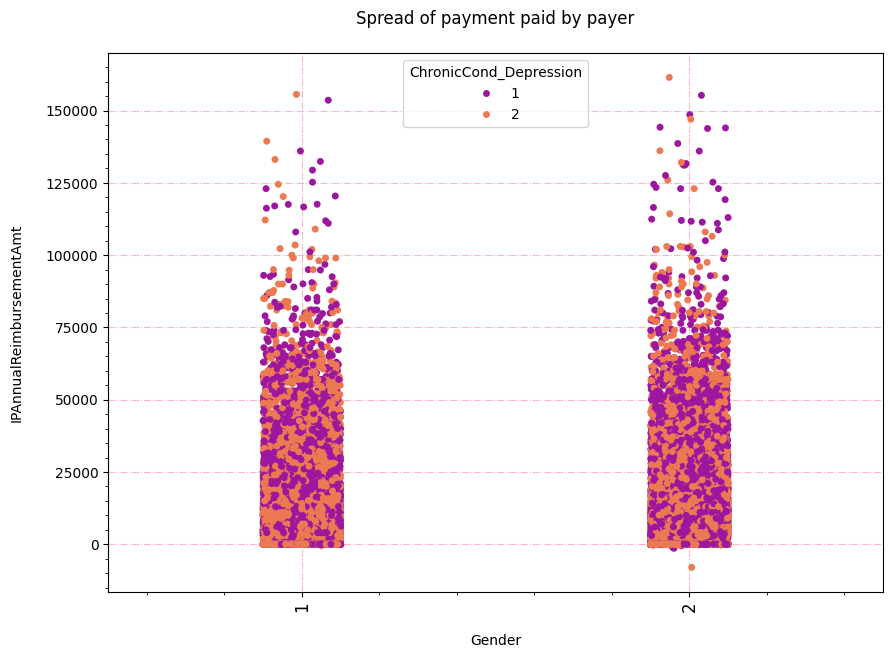

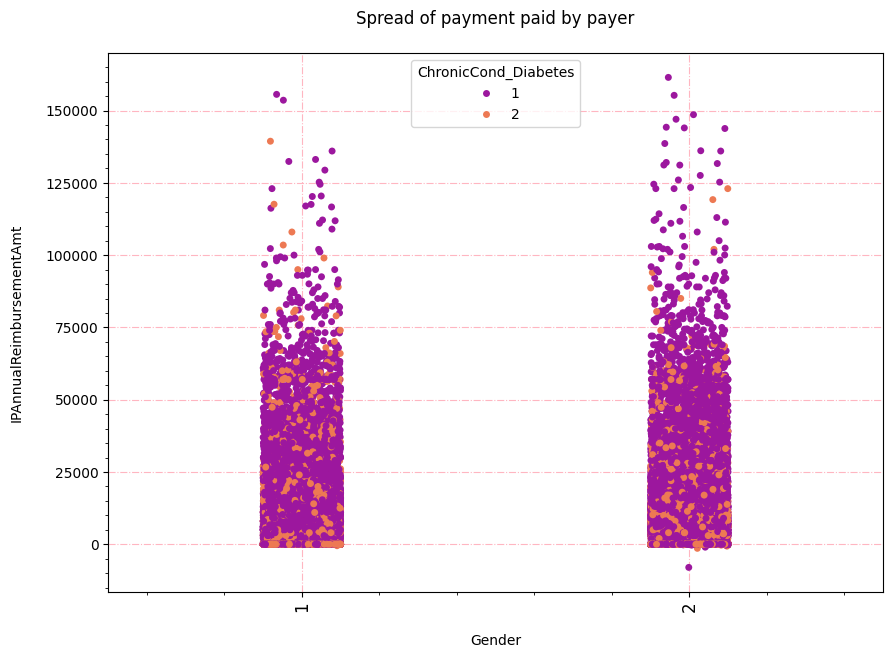

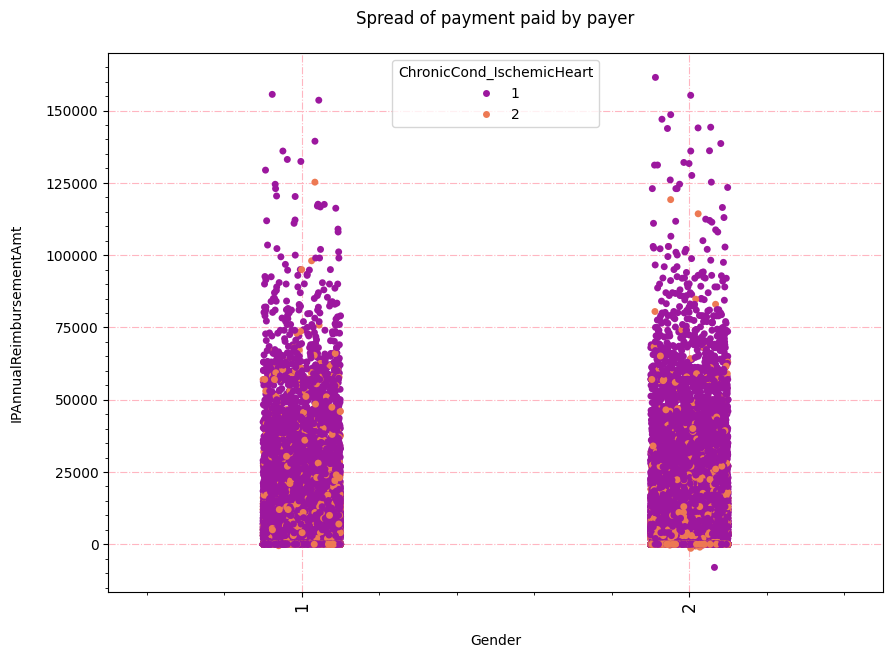

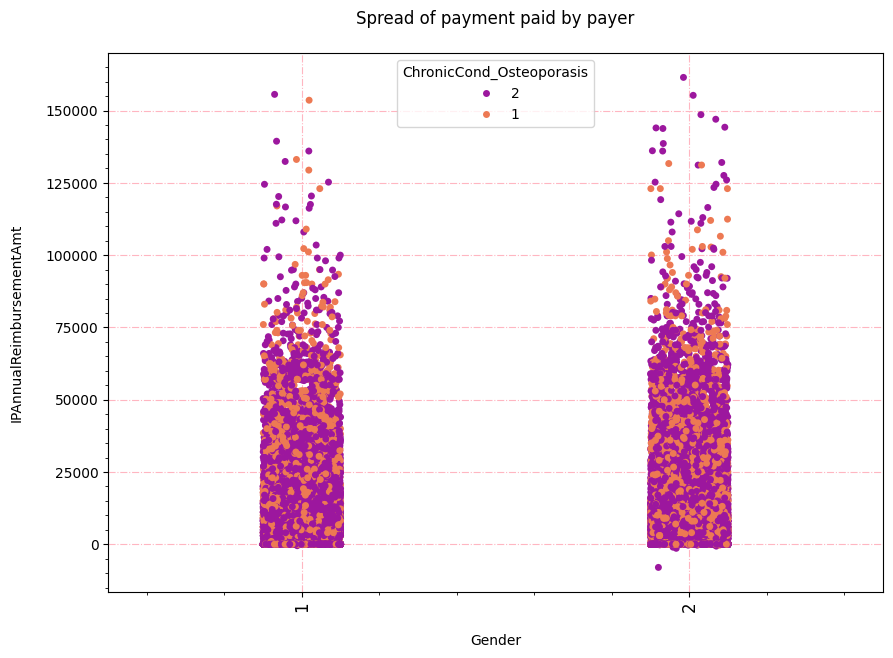

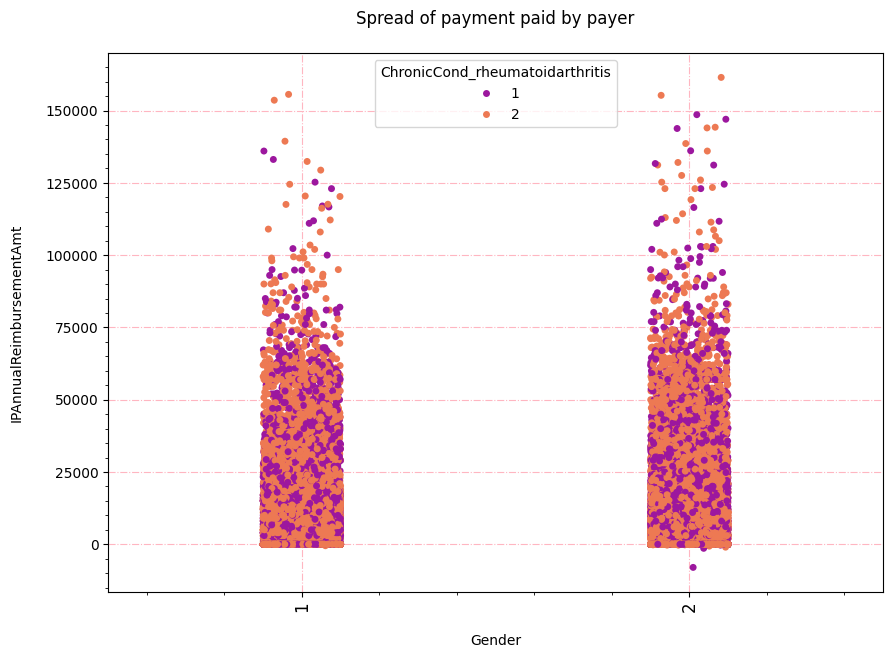

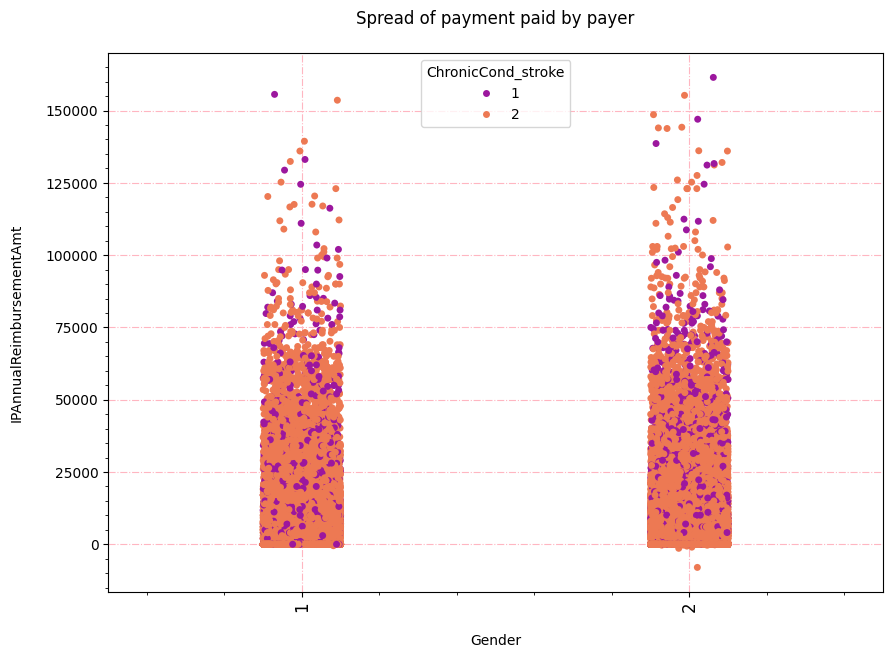

In [19]:
for i in ['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']:
    plot_strip_plots(x_col='Gender', hue_col=i, y_col='IPAnnualReimbursementAmt', lgd_title=i)

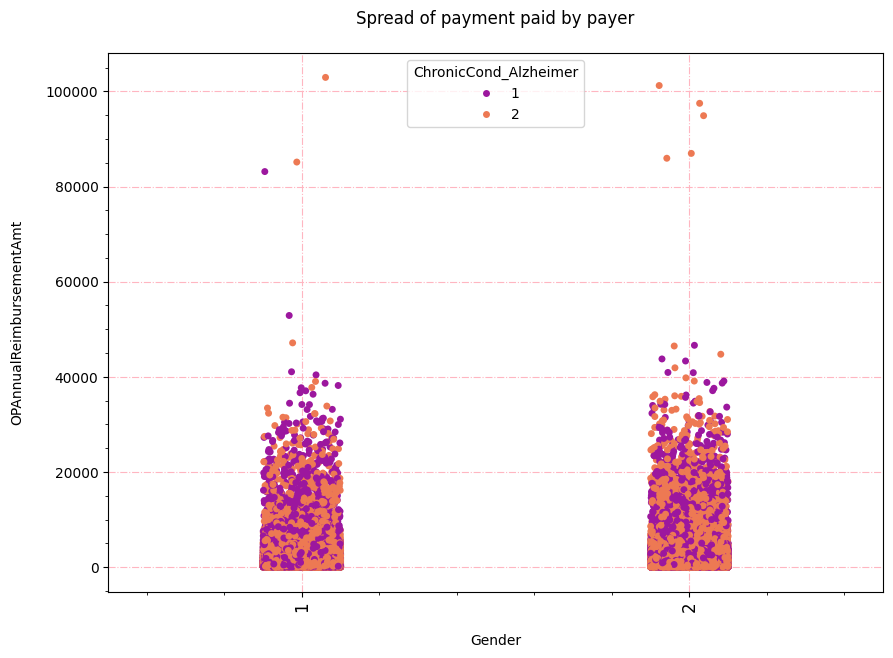

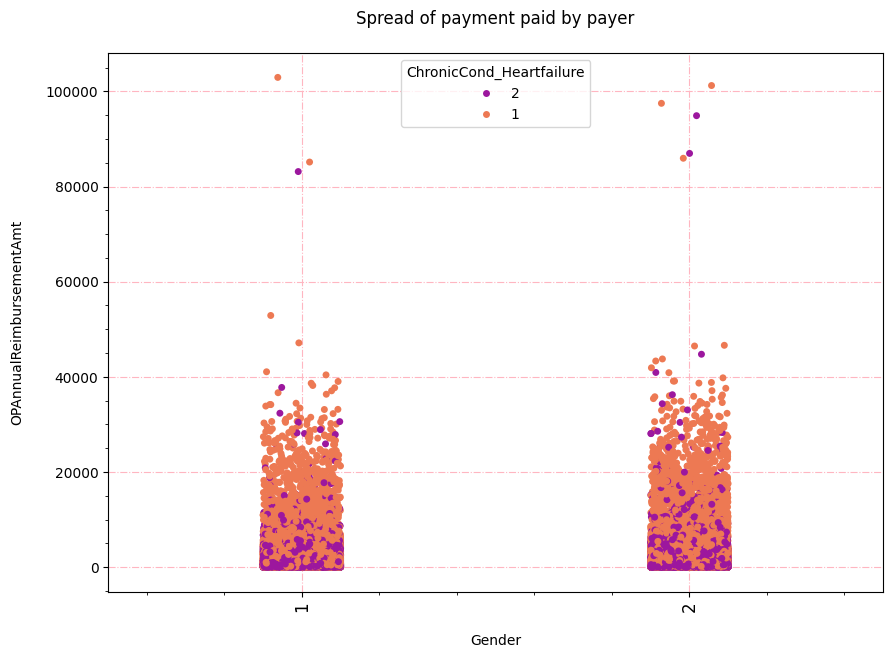

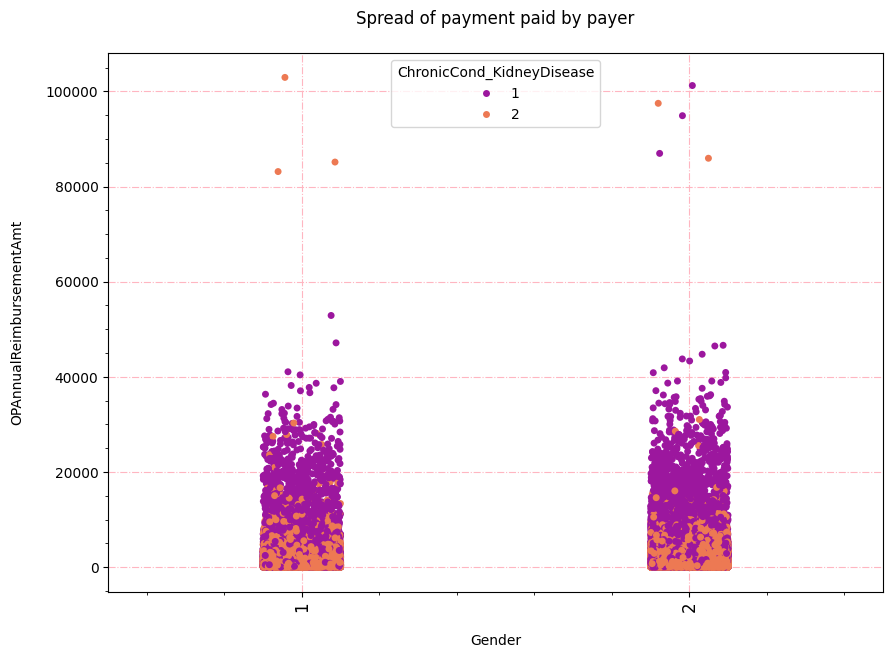

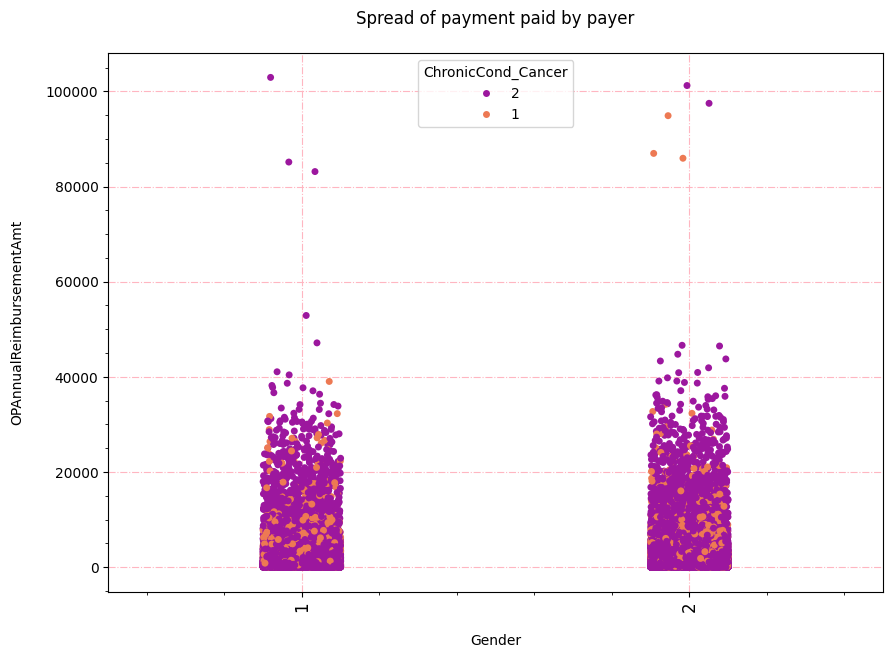

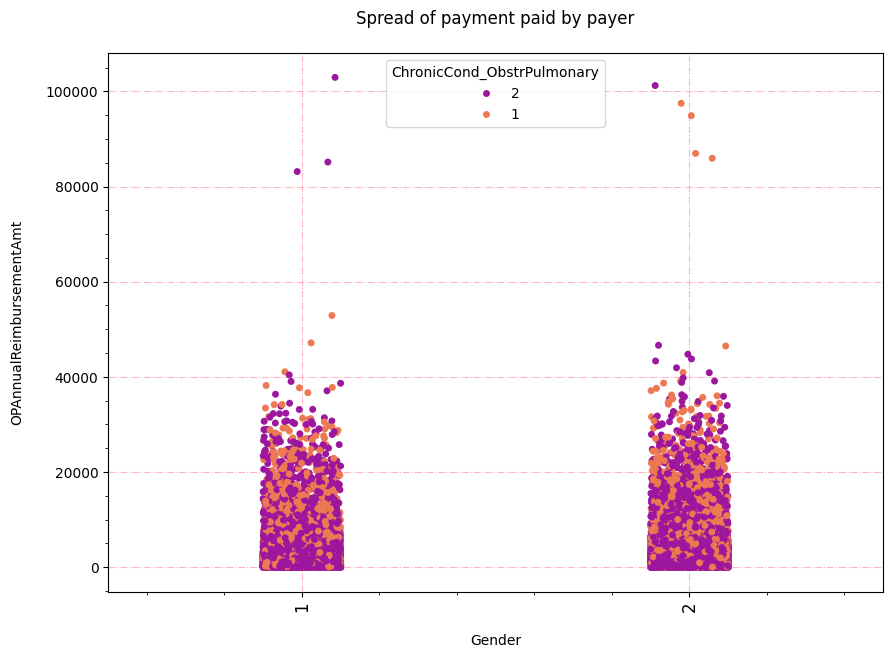

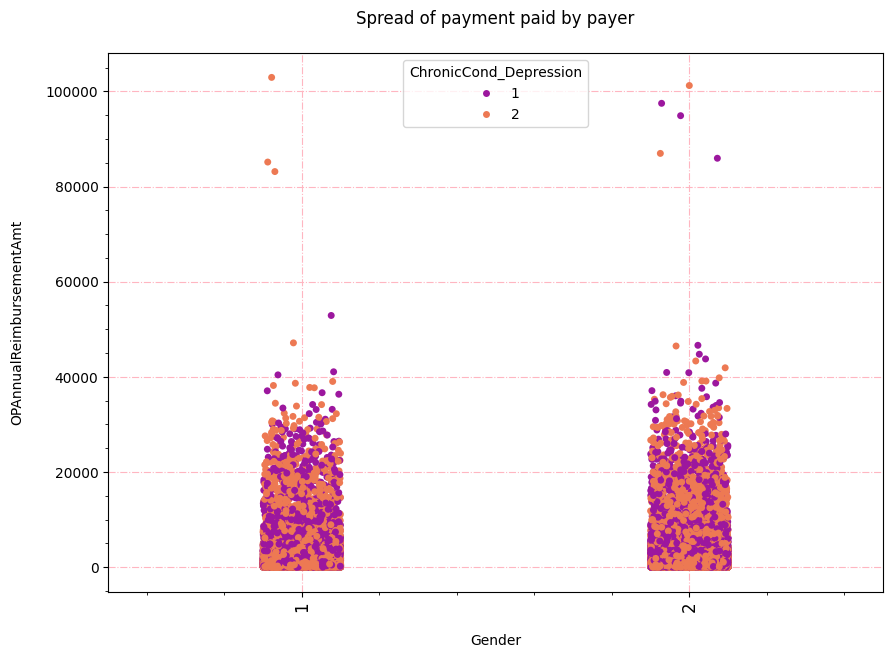

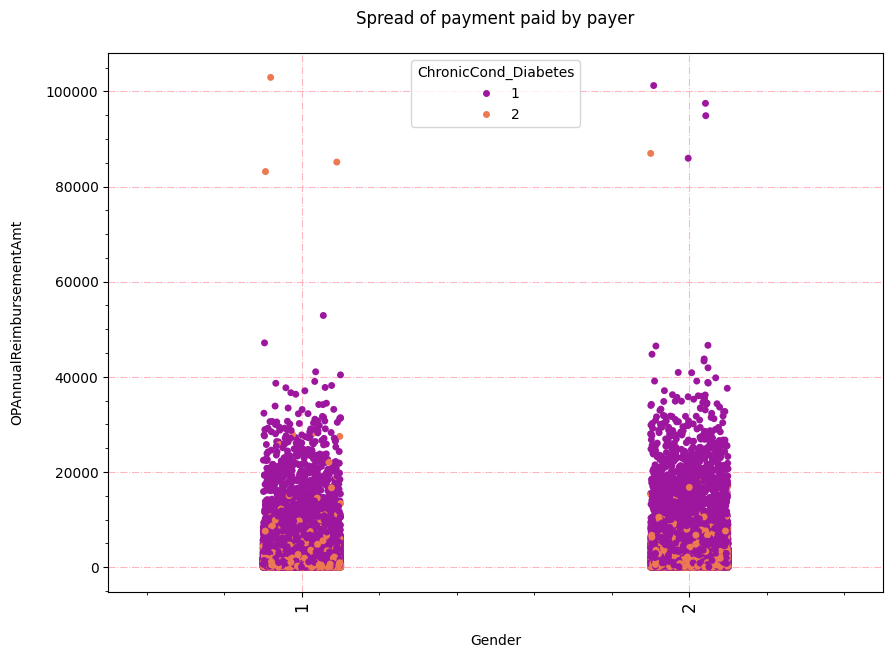

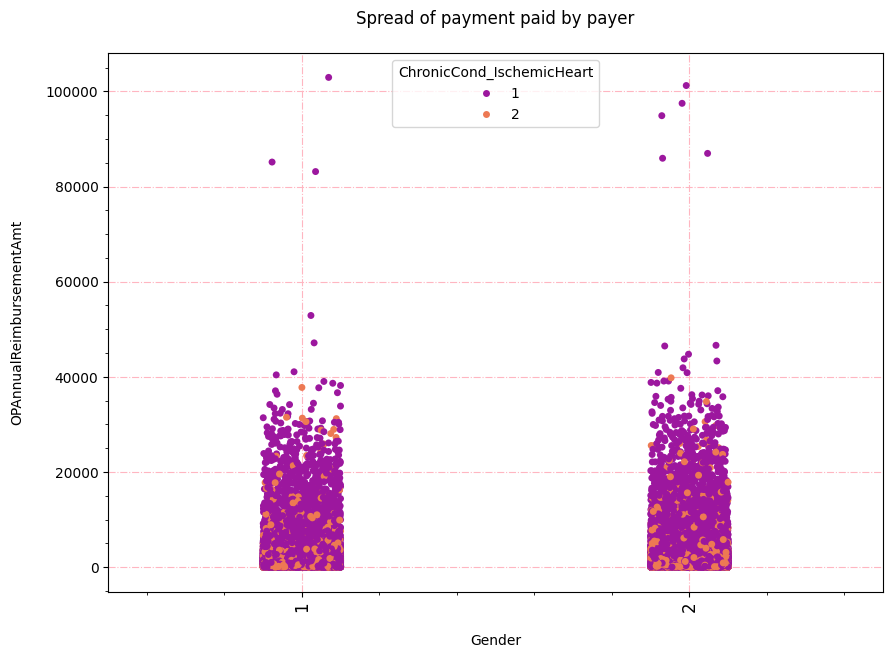

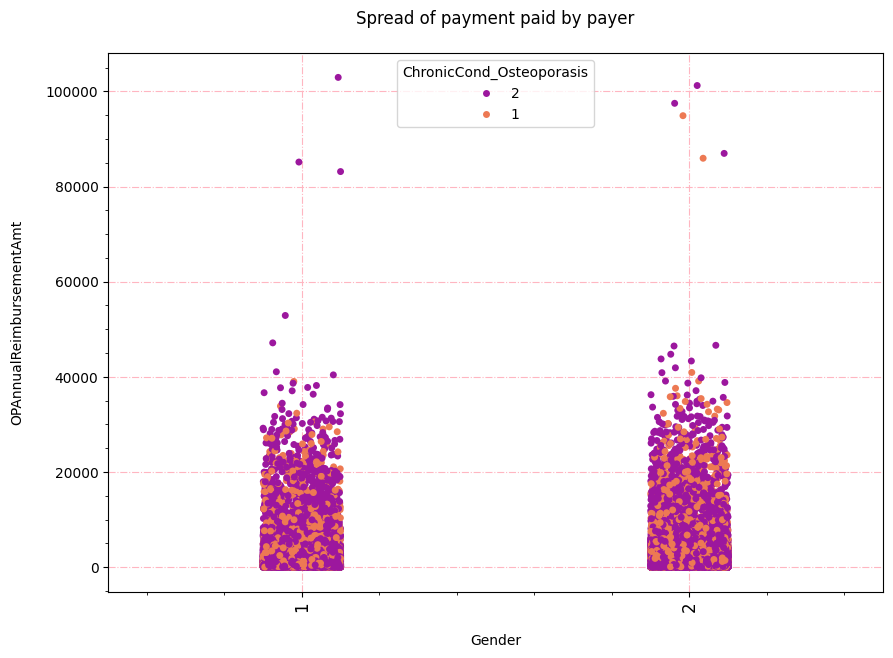

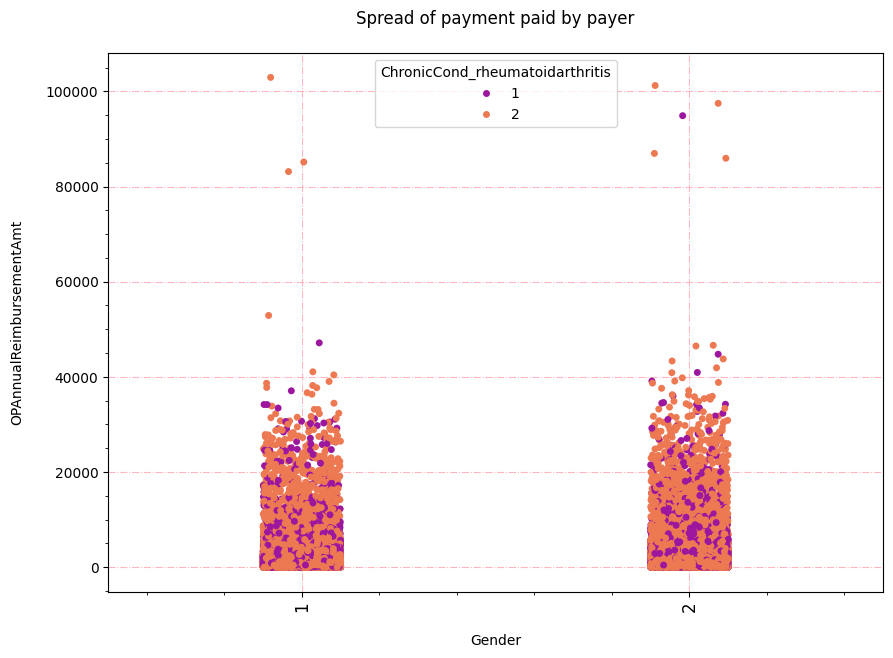

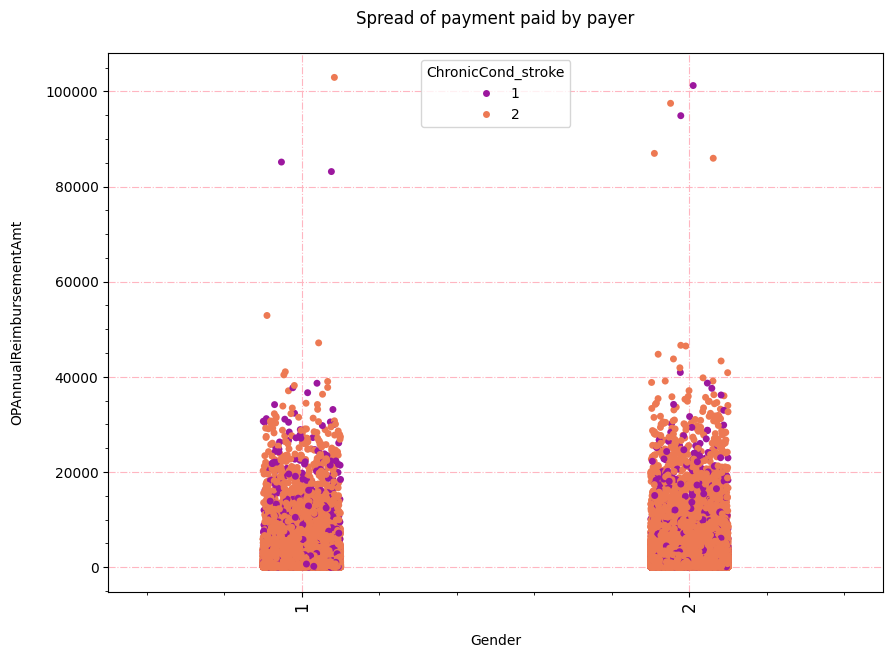

In [20]:
for i in ['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']:
    plot_strip_plots(x_col='Gender', hue_col=i, y_col='OPAnnualReimbursementAmt', lgd_title=i)

A complete overlap of data has been observed between Disease condition, reimbursement amount and gender.

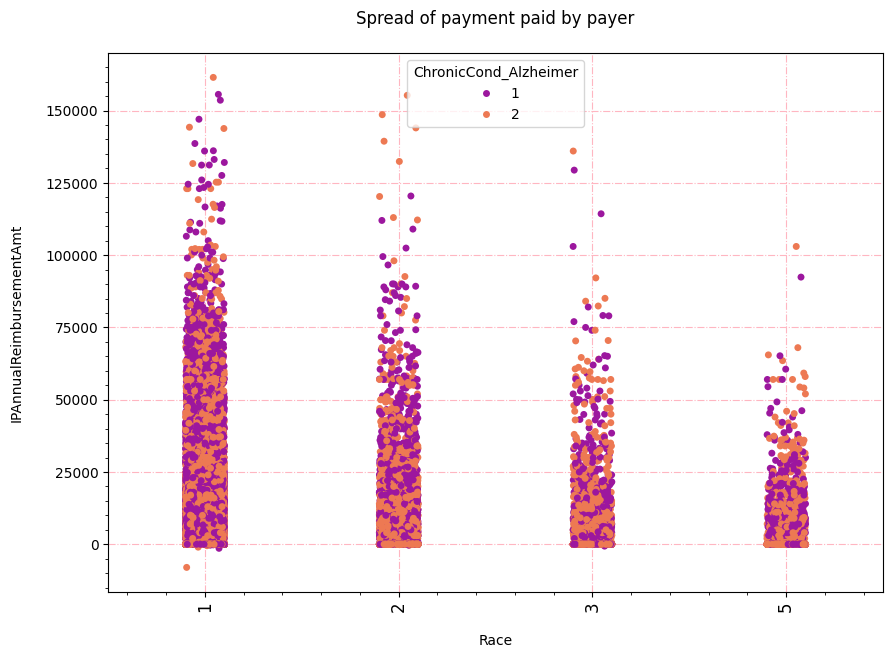

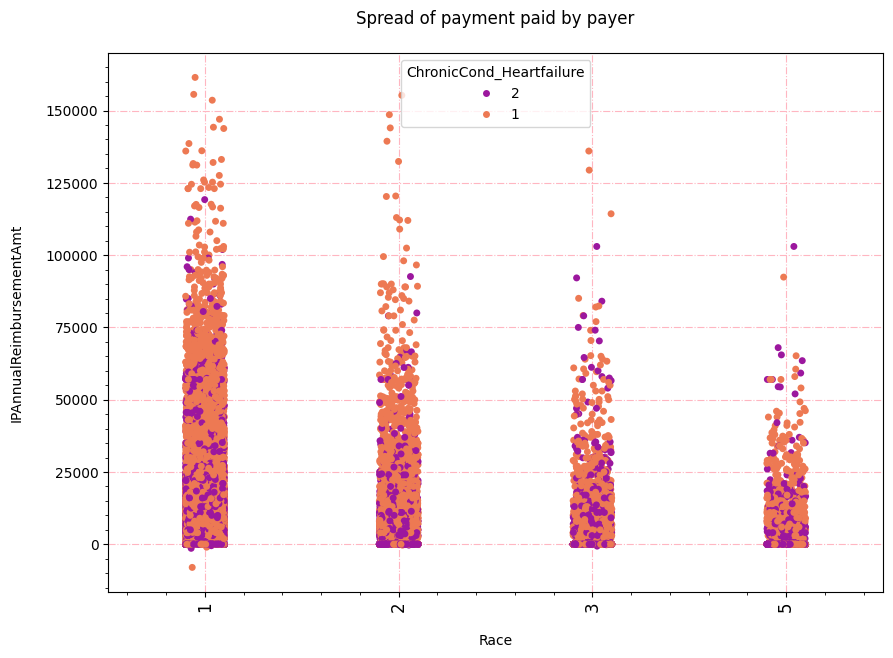

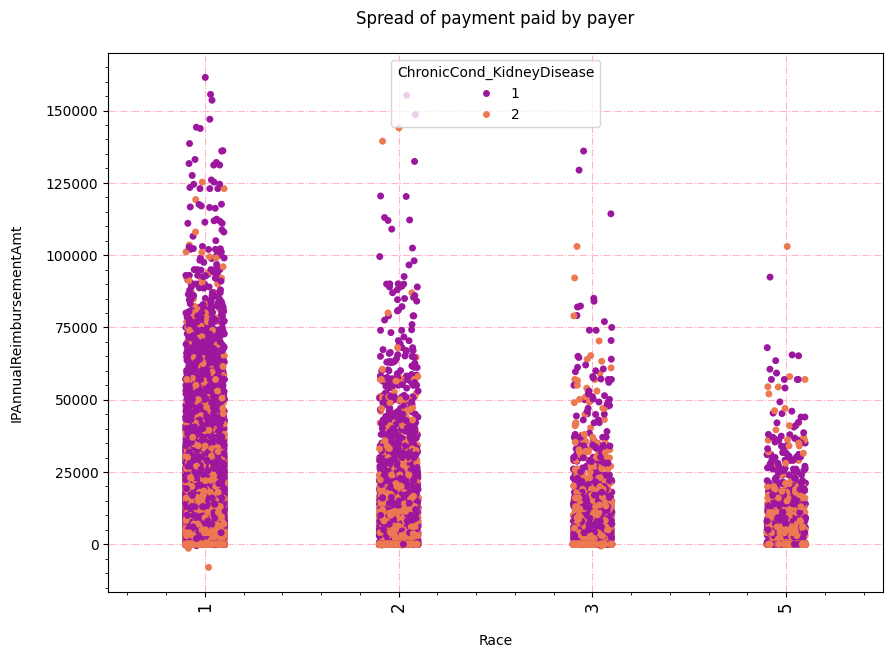

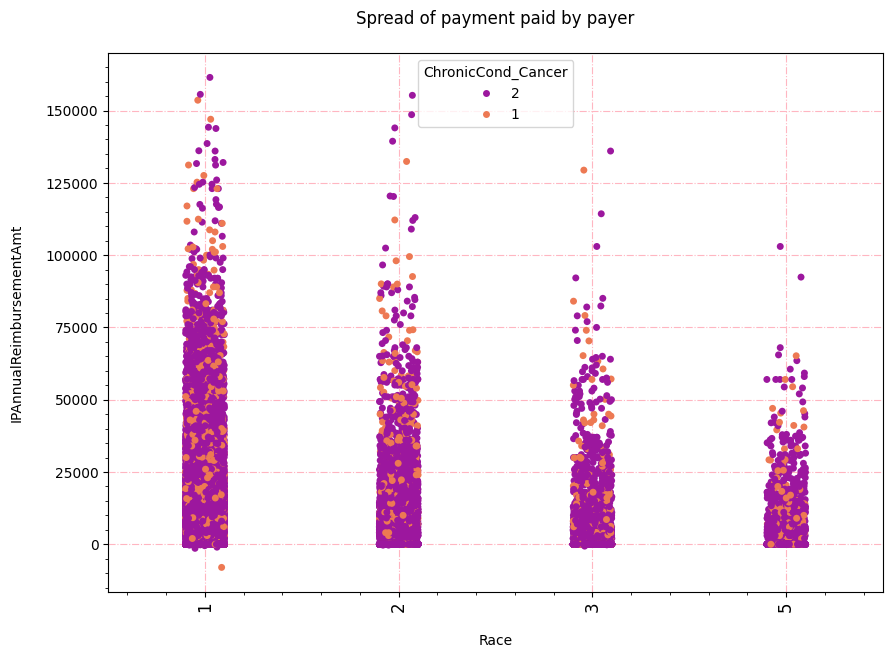

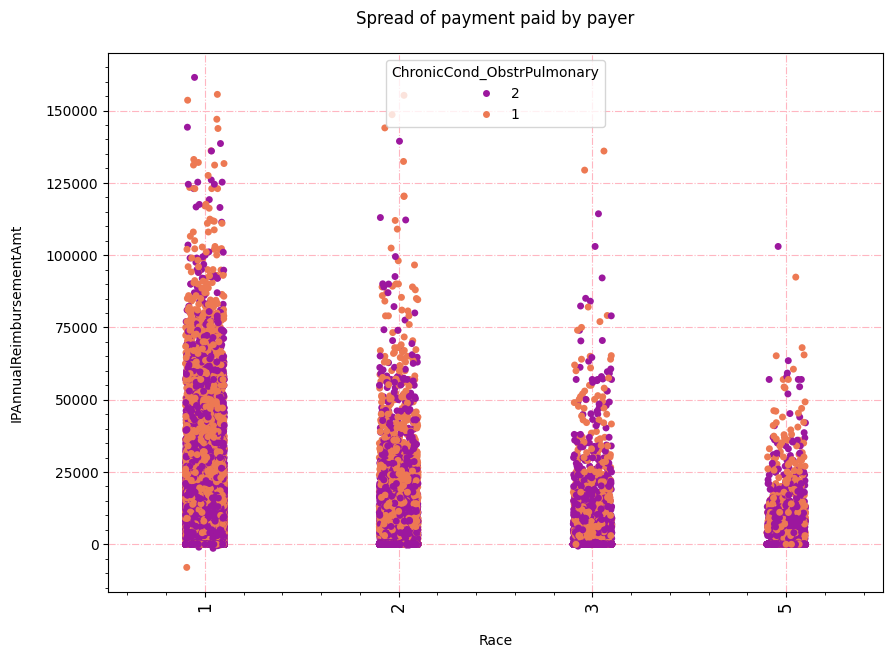

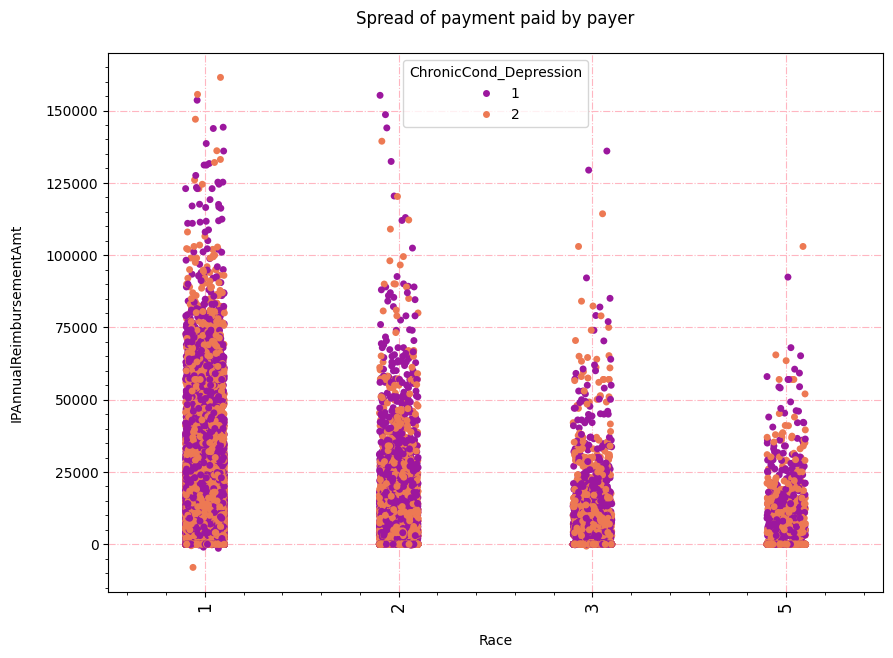

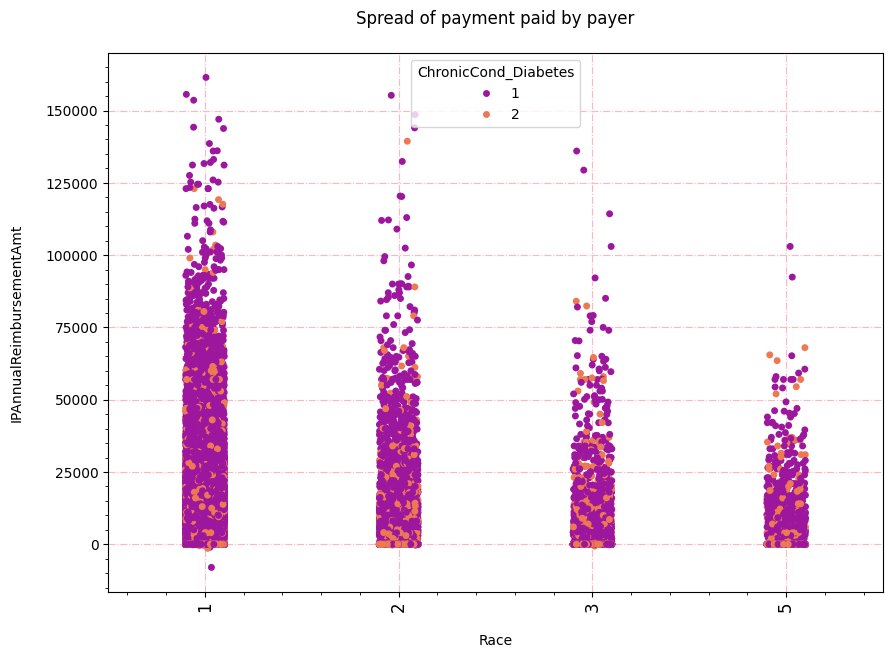

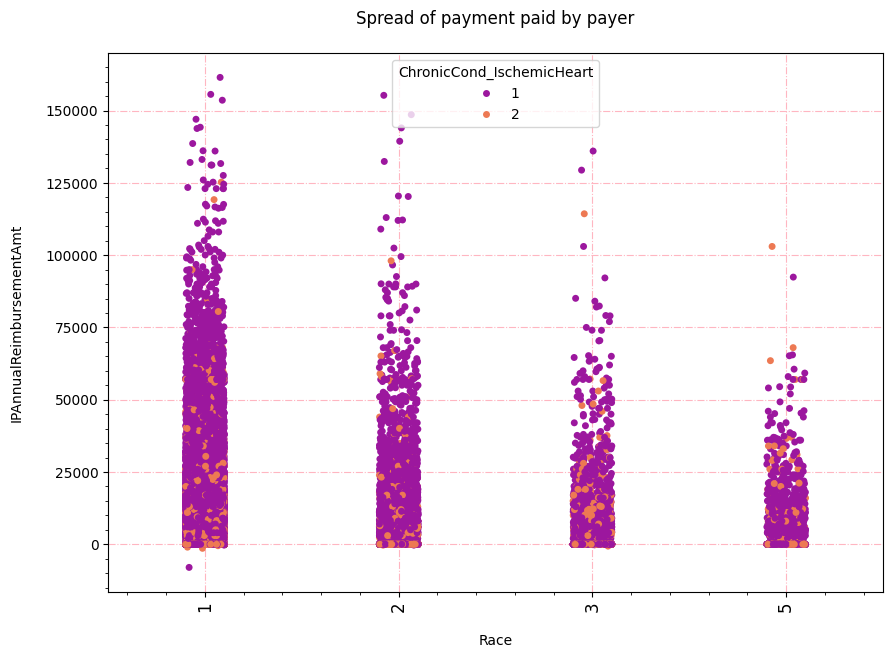

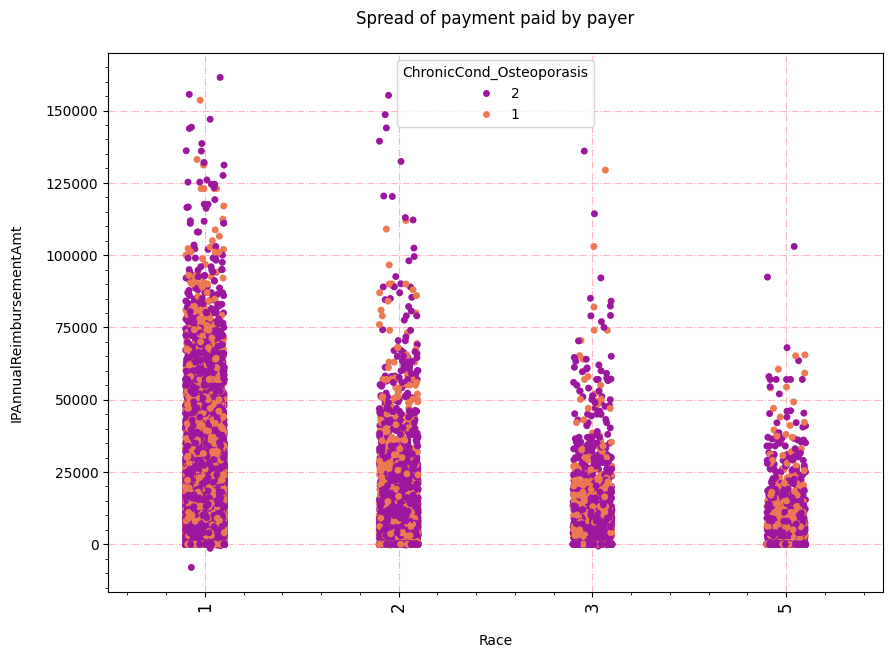

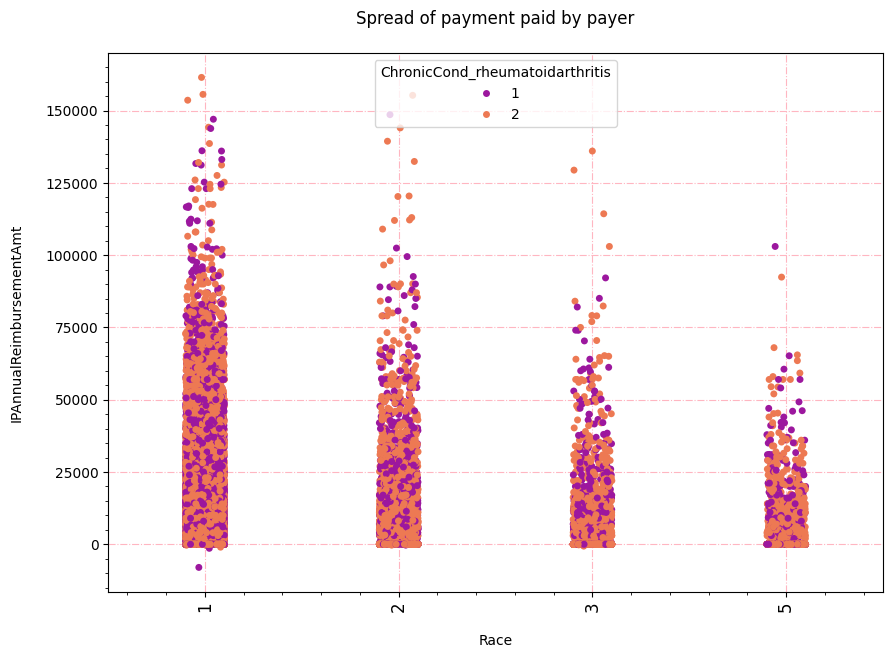

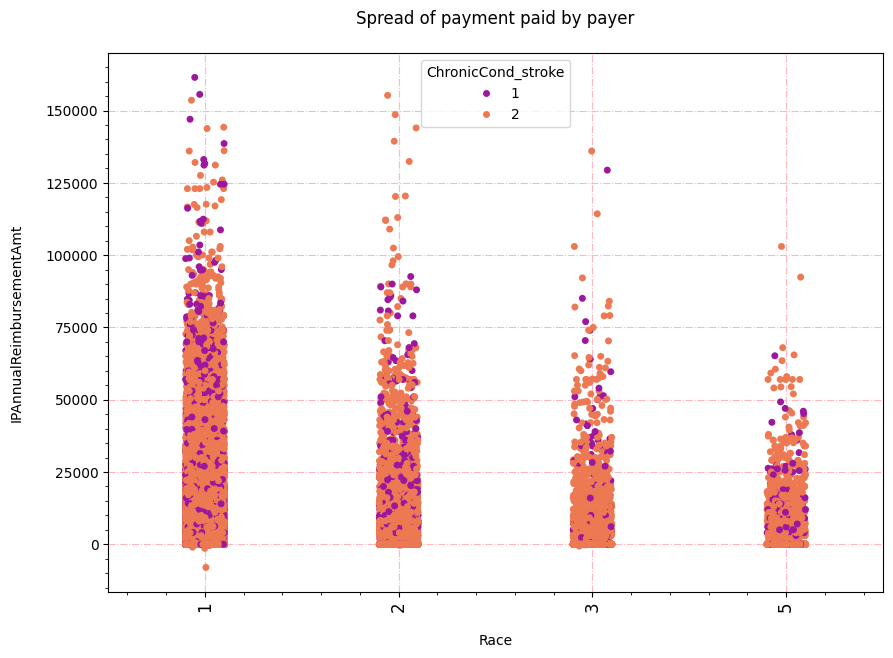

In [6]:
for i in ['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']:
    plot_strip_plots(x_col='Race', hue_col=i, y_col='IPAnnualReimbursementAmt', lgd_title=i)

In [ ]:
for i in ['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']:
    plot_strip_plots(x_col='Gender', hue_col=i, y_col='Ins', lgd_title=i)

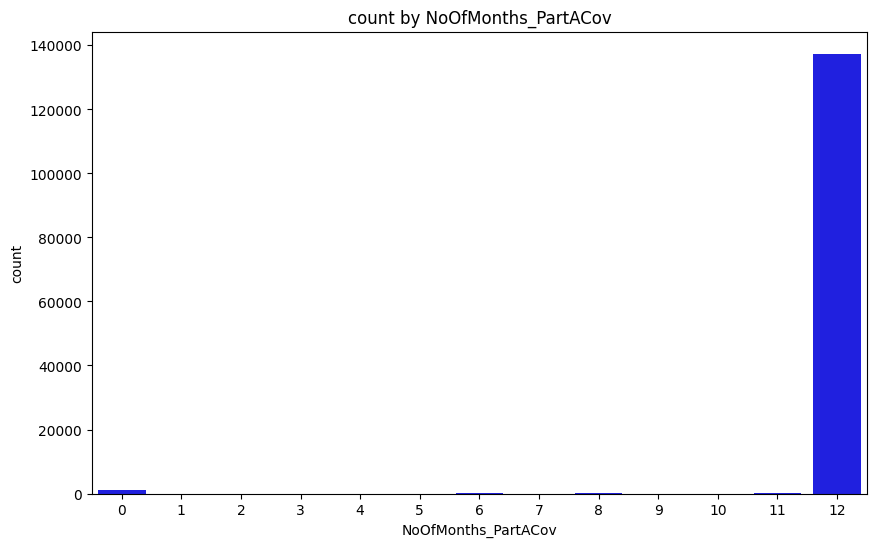

In [21]:
# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ben_conv, x='NoOfMonths_PartACov', color='blue')

# Optionally, you can add titles and labels
plt.title('count by NoOfMonths_PartACov')
plt.xlabel('NoOfMonths_PartACov')

plt.show()

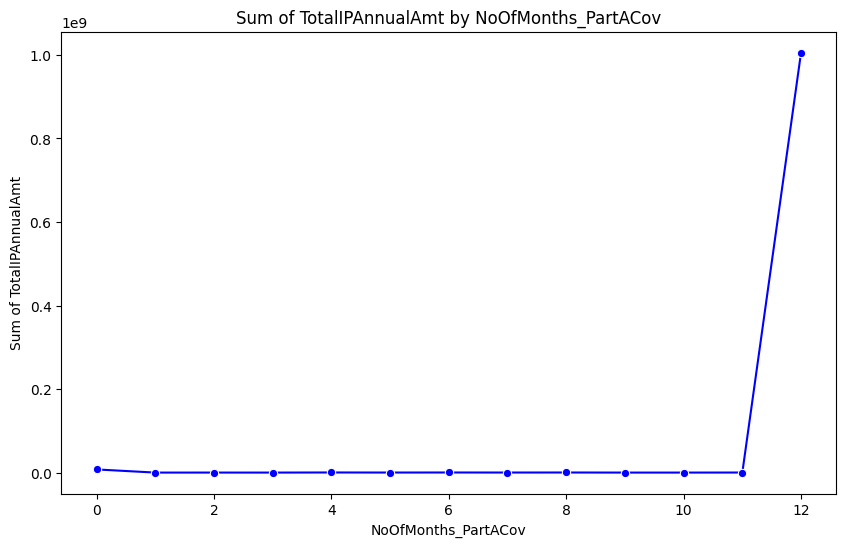

In [17]:
df_aggregated = df_ben_conv.groupby('NoOfMonths_PartACov')['TotalIPAnnualAmt'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_aggregated, x='NoOfMonths_PartACov', y='TotalIPAnnualAmt', color='blue', marker='o')

# Optionally, you can add titles and labels
plt.title('Sum of TotalIPAnnualAmt by NoOfMonths_PartACov')
plt.xlabel('NoOfMonths_PartACov')
plt.ylabel('Sum of TotalIPAnnualAmt')

plt.show()